In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Run this if using Google Colab
from google.colab import files
uploaded = files.upload()

Saving athlete_events.csv to athlete_events.csv


Let's start by reading the csv file & printing out the first 5 rows.

In [0]:
main = pd.read_csv('athlete_events.csv')
main.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We can proceed to check the number of null values for each column.
We see that Age,Height,Weight & Medal columns contain null values.
Since we are only doing visualizations of the dataset, let's keep the null values.

In [0]:
#DATA PRE-PROCESSING
#Check columns with nan values
main.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Let's begin our analysis with Sex column by checking the number of males & females. 

In [0]:
 main.groupby(['Sex'])['ID'].count()

Sex
F     74522
M    196594
Name: ID, dtype: int64

Could there be duplicate names? This may be an impact on our analysis of the Sex column. It's entirely-possible for the same athlete to participate in multiple events & years. Checking this using nunique function seems to prove that these athletes exist. In fact, checking rows for any of the repeated names shows that this is true indeed. 

In [0]:
main['Name'].nunique()

134732

What about the number of unique athletes by Sex? We can do this by keeping only the first instance of each unique name & calling value_counts function on each Sex. In fact, females constitute only 25% of all unique athletes. 

In [0]:
main.drop_duplicates(subset='Name',keep='first', inplace=False)['Sex'].value_counts()

M    100953
F     33779
Name: Sex, dtype: int64

There are various ways to check Sex against continuous variables such as Age,Heigth & Weight. One way is to treat every row as a unique athlete. However, this can result in multiple counts if athletes appear in multiple events & years. Instead, I have decided to keep only the first instance of each athlete by first ordering the data by Year & Season. This ensures that only the Age,Height & Weight of their first appearances will be left in the dataset. Afterwhich, we can visualize the data containing their entry Age,Height & Weight. We start by creating a function for sorting by Year & Season, dropping duplicate names before displaying distribution of Sex by specified column. In addition, plots are displayed separately for easier analysis.

In [0]:
def entrant_stats(col):
    main_unique = main.sort_values(by=['Year','Season']).drop_duplicates(subset='Name',keep='first')
    main_unique[col].hist(by=main_unique['Sex'],figsize=(20,10))

Distribution of Sex by Age.
Median entry Age of females seem to be slightly-lower, otherwise distributions seem fairly-similar.

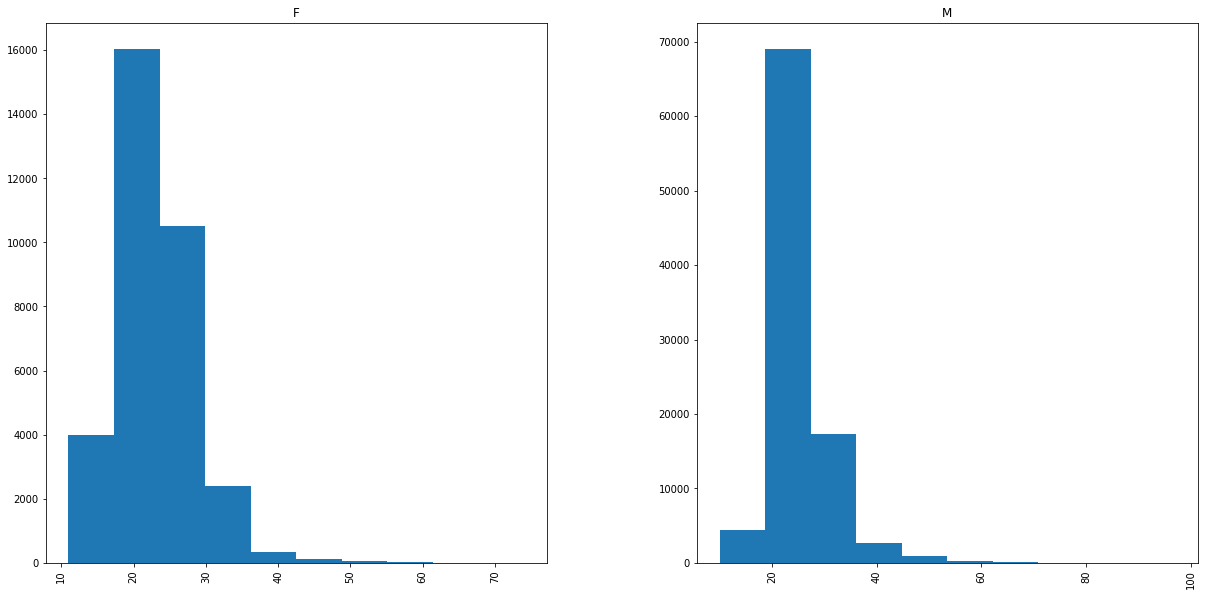

In [0]:
entrant_stats('Age')

Distribution of Sex by Height. Median entry Height of females is below 170cm while median entry Height of males exceeds 180cm.

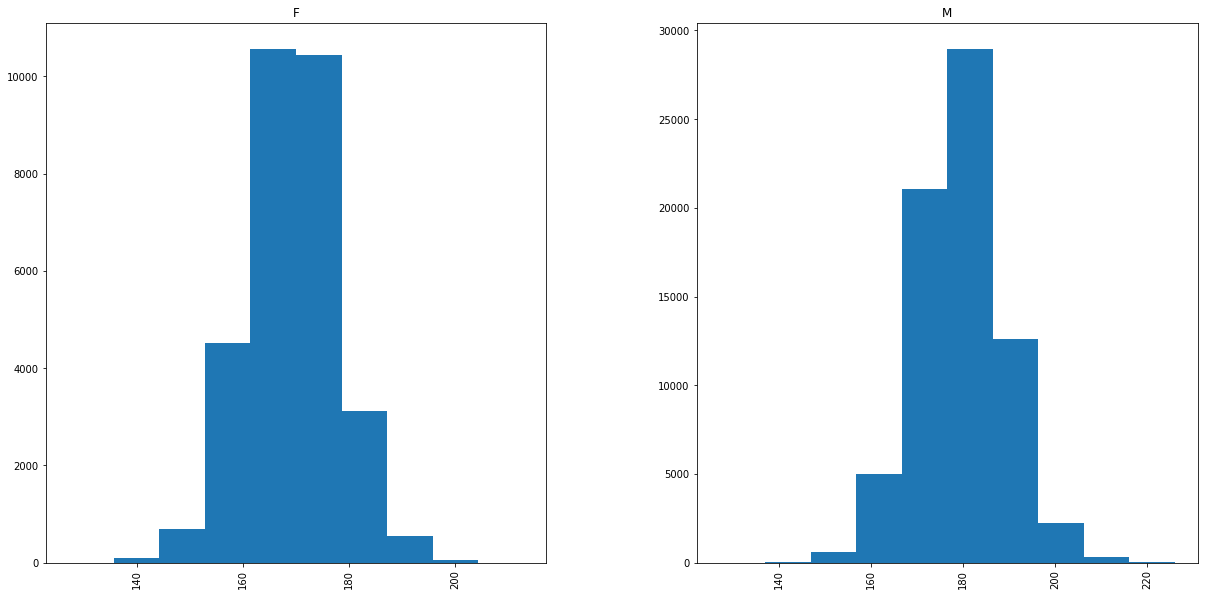

In [0]:
entrant_stats('Height')

Distribution of Sex by Weight. Median entry Weight of females is around 60kg while median entry Weight of males exceeds 75kg.

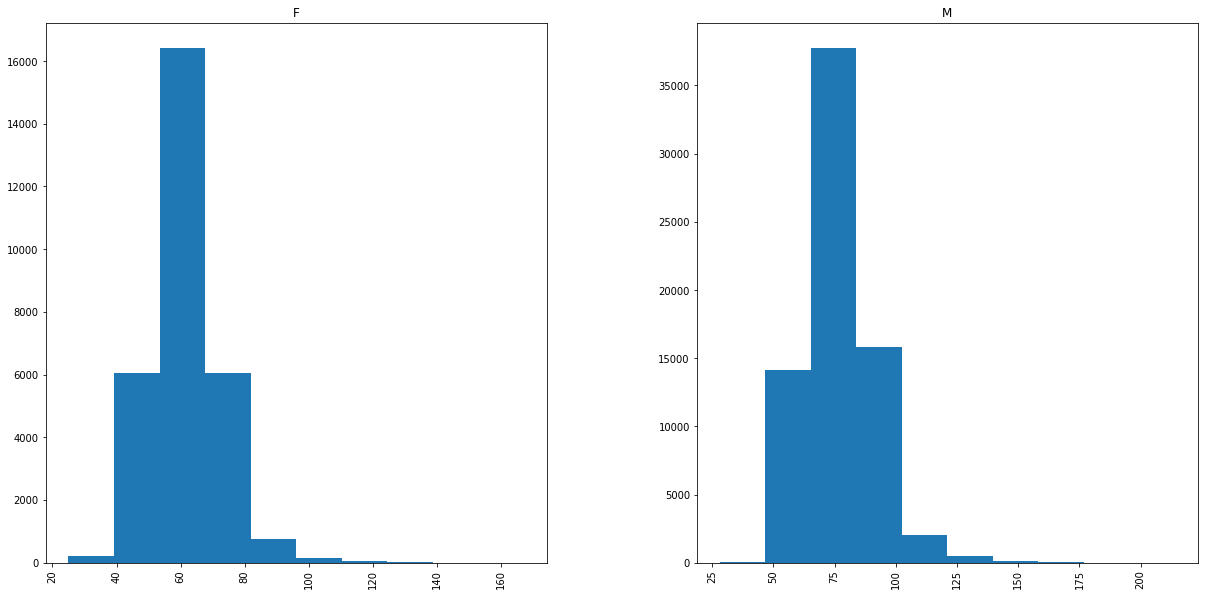

In [0]:
entrant_stats('Weight')

In [0]:
#Printing out all column names to facilitate our analysis.
main.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

Distribution of Sex by NOC. Some athletes's NOC differs from Team & their Team values sometimes contain 2 countries or some other weird values. As such, I'm going to use NOC as the country represented by the athletes. Due to the sheer number of unique NOC values, I'm going to plot both males & females on the same plot. This can done by grouping the dataset by NOC & Sex before unstacking the values. In addition, I created another column('Total') for sorting the data by total athletes before plotting it out. Note that some NOCs only sent athletes of one Sex so it is necessary to fill the null female values with 0. In fact, USA seems to have the highest proportion of athletes.

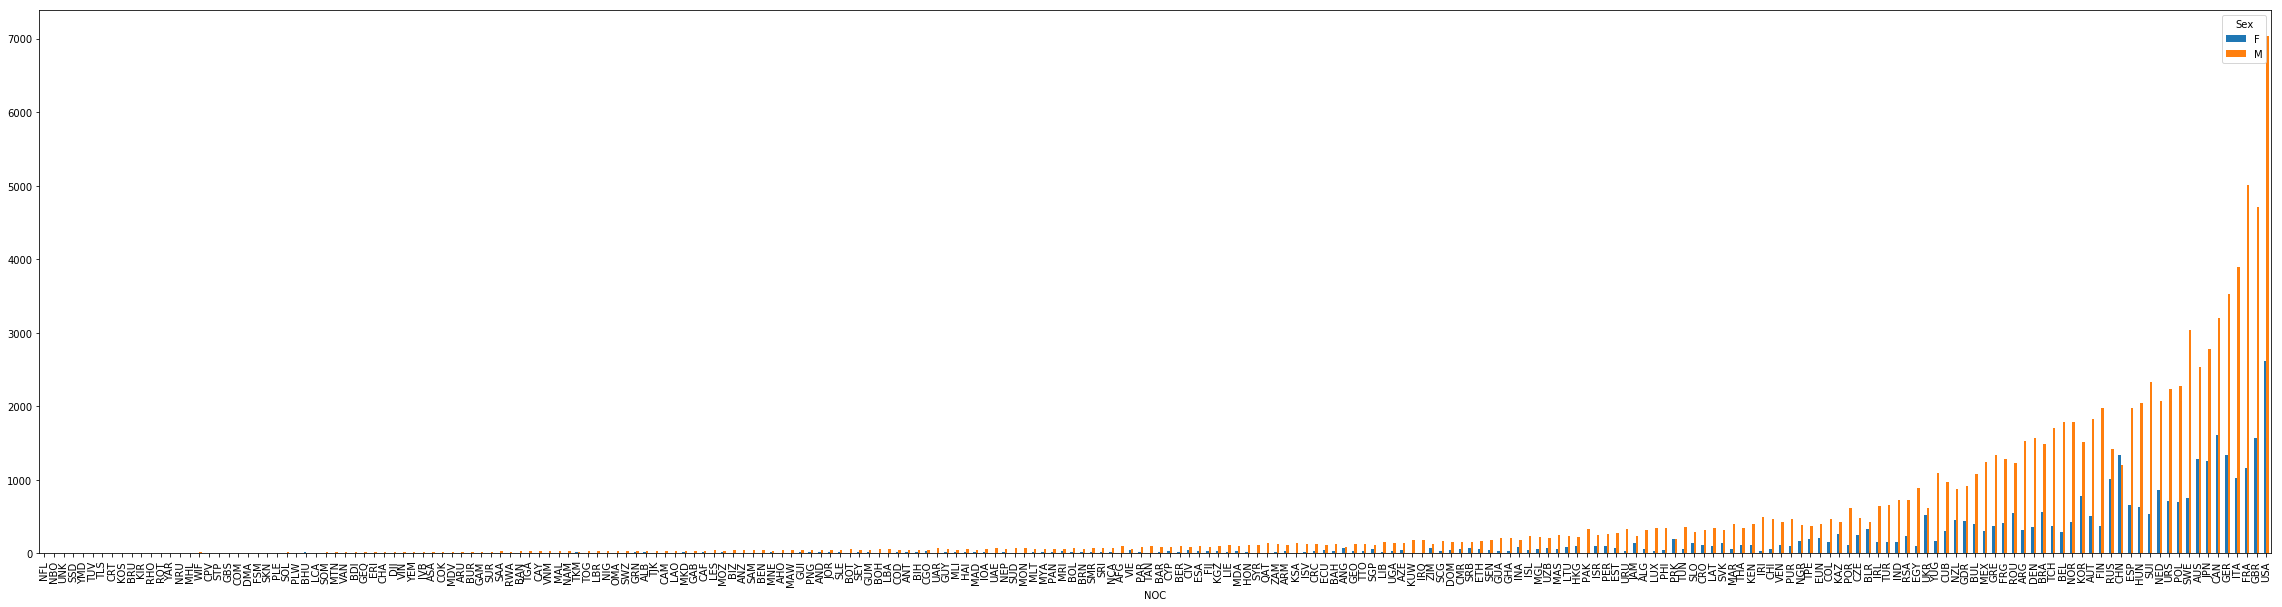

In [0]:
new_df = main.groupby(['NOC','Sex'])['Name'].nunique().unstack()
new_df.fillna(0,inplace=True)
new_df['Total'] = new_df['M'] + new_df['F']
new_df = new_df.sort_values(by='Total').drop(labels='Total',axis=1)
new_df.plot(kind='bar',figsize=(40,10))

Distribution of Sex by Games. Similarly, we only consider the number of unique males & females for each game. The data is grouped by Games & Sex befpre doing a unique count on Name. Again, I created a new column('Total') to facilitate sorting of the data by total athletes before plotting it. Note that there are only males for Summer 1896 so it's necessary to fill null female values with 0. Overall, it's clear that summer games contain more unique athletes than winter games. However, total participating athletes is not guaranteed to increase over the years. 2016 Summer has the most number of unique participants.

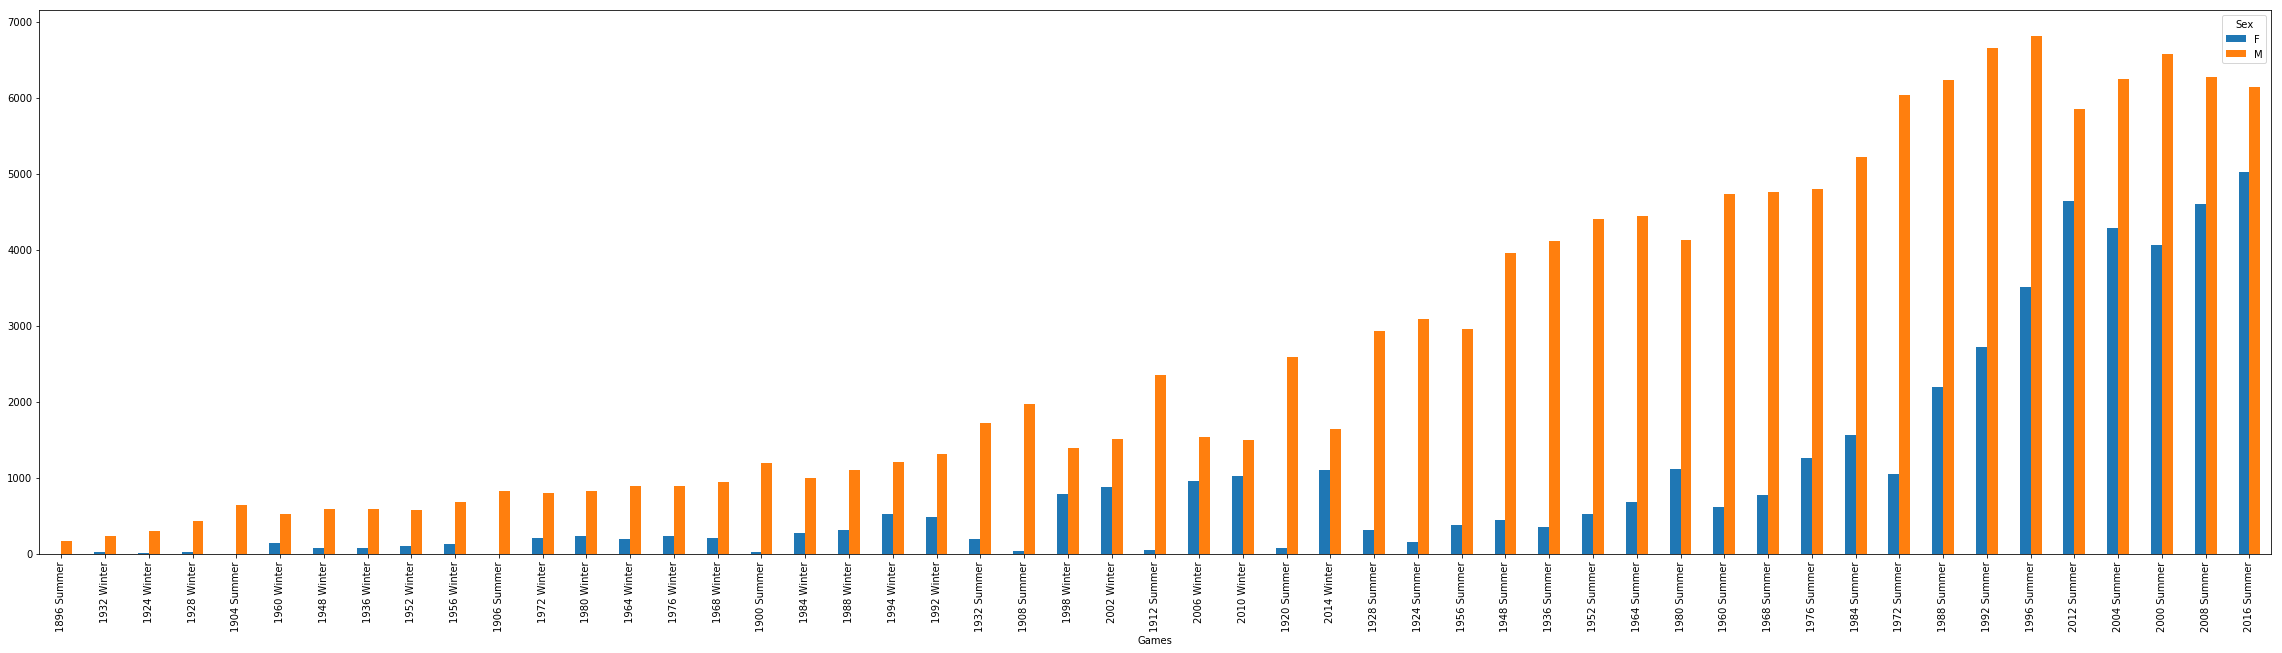

In [0]:
new_df = main.groupby(['Games','Sex'])['Name'].nunique().unstack()
new_df.fillna(0,inplace=True)
new_df['Total'] = new_df['M'] + new_df['F']
new_df = new_df.sort_values(by='Total').drop(labels='Total',axis=1)
new_df.plot(kind='bar',figsize=(40,10))

Distribution of Sex by Year. We count unique athletes in each year via grouping by Year & Sex before getting unique Name counts. The resulting plot shows the count of unique athletes for each Year separated by Sex.

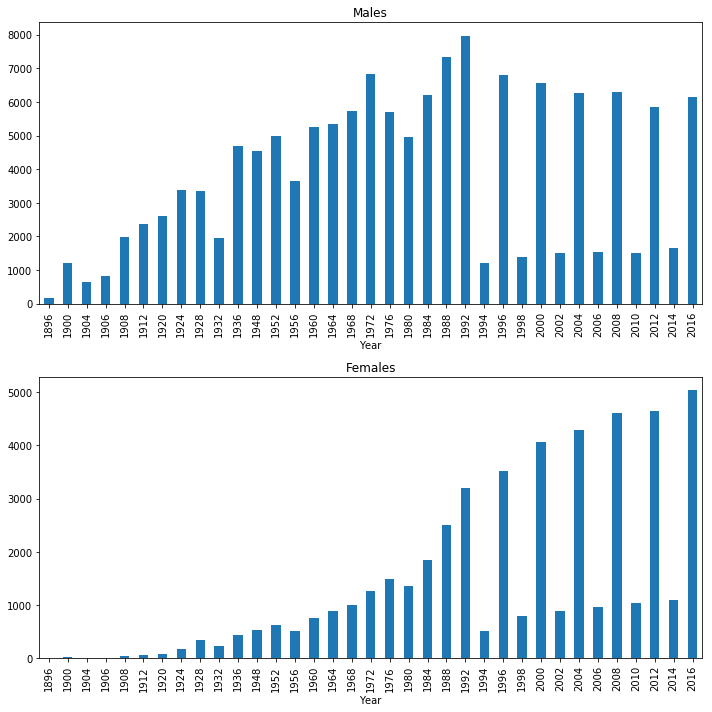

In [0]:
new_df = main.groupby(['Year','Sex'])['Name'].nunique().unstack()
new_df.fillna(0,inplace=True)
_,axes = plt.subplots(2,1)
new_df['M'].plot(kind='bar',figsize=(10,10),ax=axes[0])
axes[0].title.set_text('Males')
new_df['F'].plot(kind='bar',figsize=(10,10),ax=axes[1])
axes[1].title.set_text('Females')
plt.tight_layout()

Distribution of Sex by City. We count unique athletes in each City via grouping by City & Sex before getting unique Name counts. London seems to be the most-popular City for both genders.

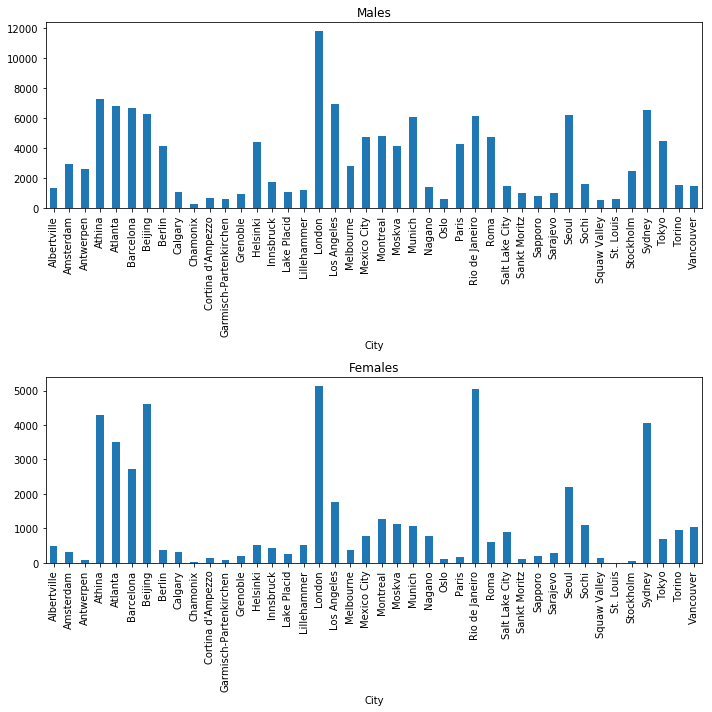

In [0]:
new_df = main.groupby(['City','Sex'])['Name'].nunique().unstack()
new_df.fillna(0,inplace=True)
_,axes = plt.subplots(2,1)
new_df['M'].plot(kind='bar',figsize=(10,10),ax=axes[0])
axes[0].title.set_text('Males')
new_df['F'].plot(kind='bar',figsize=(10,10),ax=axes[1])
axes[1].title.set_text('Females')
plt.tight_layout()

Distribution of Sex by Sport. Here, there's no need to count only unique names since it's possible for the same athlete to participate in multiple sports. We can group the data by Sport & Sex before unstacking the values. Again, I created a new column('Total') to facilitate sorting. Also, some sports only cater to one Sex so it's necessary to fill the null values with 0. In fact, athletics is the most-popular Sport for both genders.

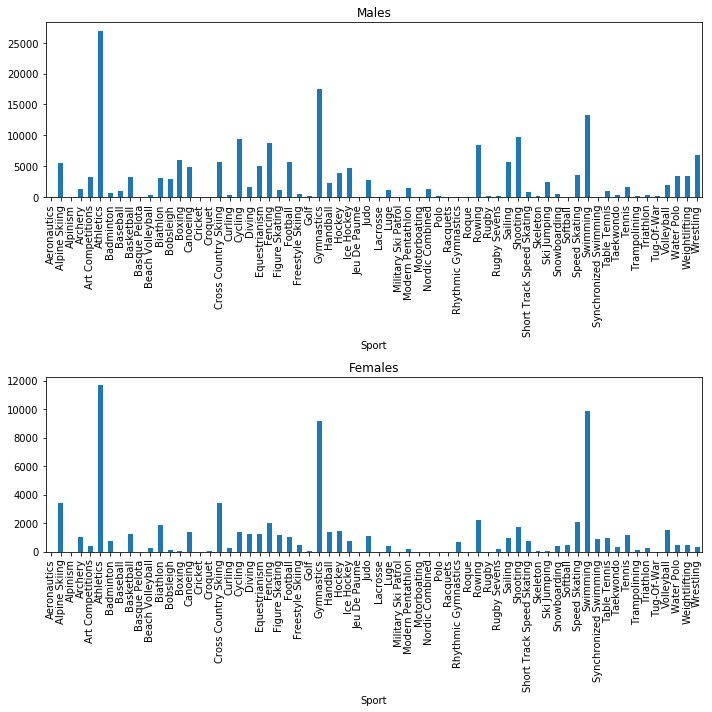

In [0]:
new_df = main.groupby(['Sport','Sex']).size().unstack()
new_df.fillna(0,inplace=True)
_,axes = plt.subplots(2,1)
new_df['M'].plot(kind='bar',figsize=(10,10),ax=axes[0])
axes[0].title.set_text('Males')
new_df['F'].plot(kind='bar',figsize=(10,10),ax=axes[1])
axes[1].title.set_text('Females')
plt.tight_layout()

Distribution of Sex by Medal. The resulting plot shows the number of times each Medal is won by each Sex.

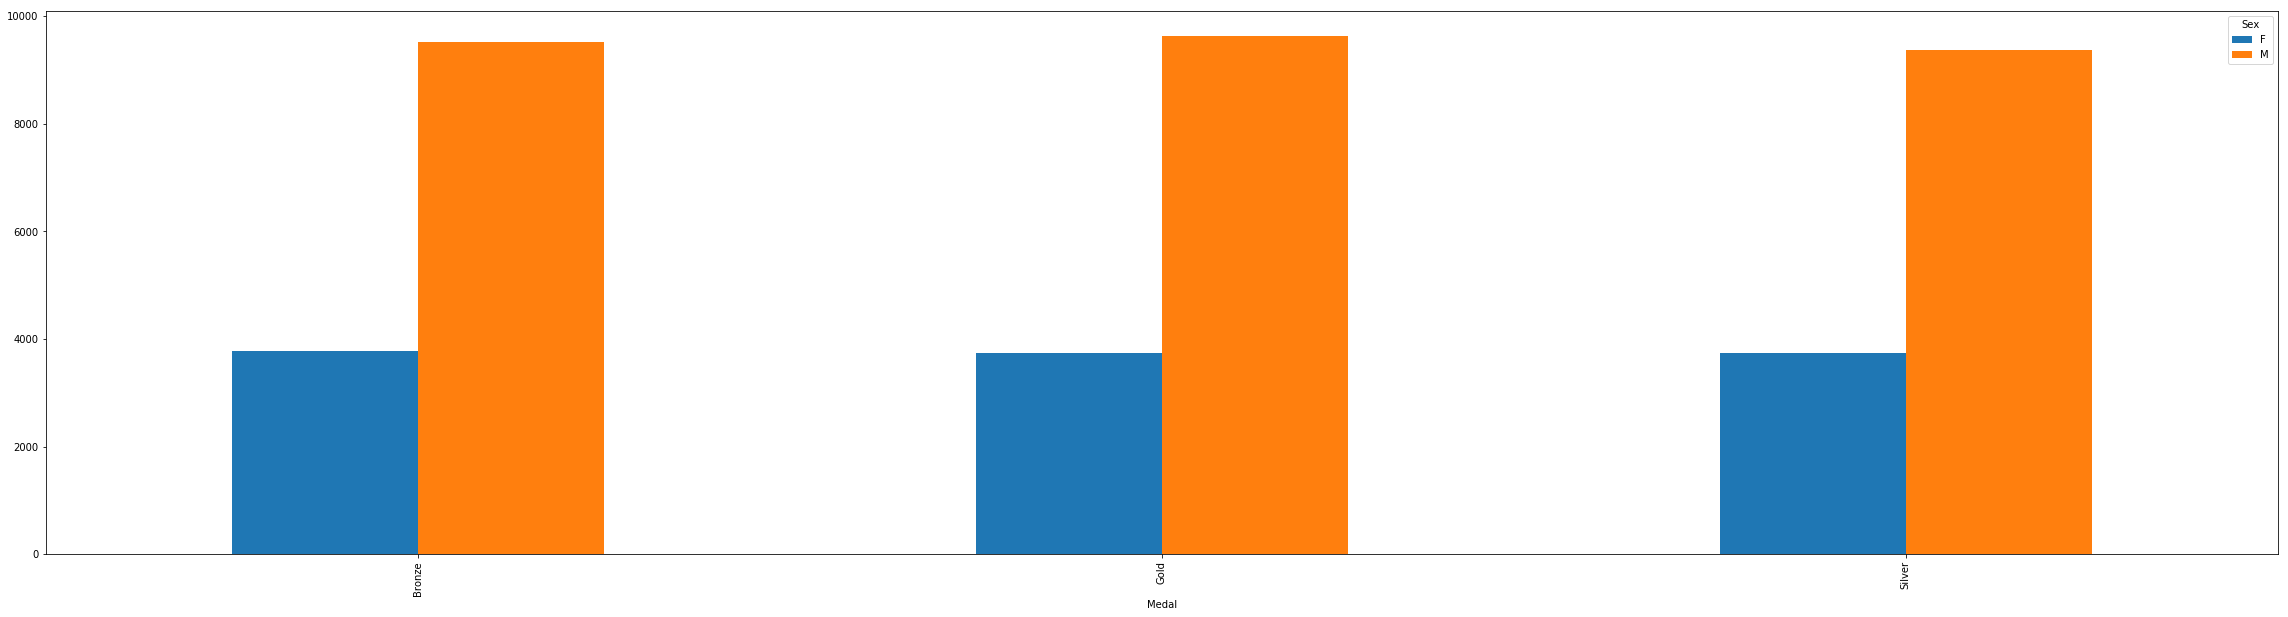

In [0]:
new_df = main.groupby(['Medal', 'Sex']).size().unstack()
new_df.plot(kind='bar',figsize=(40,10))

Looking at unique medal-winning athletes separated by Sex, females(22%) have a higher proportion compared to males(20%).

In [0]:
round(main[(main['Medal'].notnull()) & (main['Sex']=='M')]['Name'].nunique()/main[main['Sex']=='M']['Name'].nunique()*100,1)

20.6

In [0]:
round(main[(main['Medal'].notnull()) & (main['Sex']=='F')]['Name'].nunique()/main[main['Sex']=='F']['Name'].nunique()*100,1)

22.0

Season is skipped since it's clear from the Game's plot that summmer contains more male & female athletes compared to winter. In addition, Event is skipped since they are gender-specific.

We check continuous variables Height & Weight against Age. Note that there's no need to consider unique individuals in this case since we are only investigating the relationship between continuous variables. In fact, scatter plots are shown for a clearer depiction of the relationship between variables.

Scatterplot of Height against Age. In fact, there's no clear indication that increasing one's Age results in greater Height. This makes sense since a person's Height tends to reach a certain number & stays constant as he/she ages.

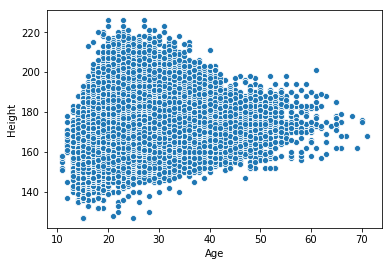

In [0]:
sns.scatterplot(x=main['Age'],y=main['Height'])

Scatterplot of Weight against Age. Again, no clear indication that an increase in a  person's Weight is followed by Age increase.

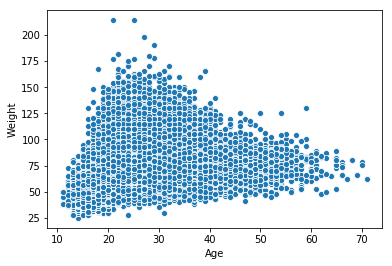

In [0]:
sns.scatterplot(x=main['Age'],y=main['Weight'])

Using NOC as represented country, we can calculate mean Age of athletes sent by countries over the years. To do this, we remove duplicate rows based on Name & Age. This achieves the same effect as looping through each unique year & keeping only the first instance of each athlete. The resulting dataset is grouped by NOC & Year before the mean Age for each group is calculated. To calculate average across all years for each NOC, we call mean function on axis=1(rows) and assign the values to a new column('Average'). Finally, the data is sorted by the Average values before plotting out the resulting barchart. Ignoring last 2 countries(due to null values), Mongolia fields the oldest athletes by mean Age across all years.

It is important to understand this method as it will be used often in our analysis.

To further explain this method, consider the situation where I need to remove duplicate athletes in the same Year. The usual way would be to loop through each unique Year & keep only the first instance of each unique athlete. However, notice that Name-Age pairs are unique for every athlete. That is, if the same athlete participates in multiple events in the same Year, those rows will contain the same Name & Age values. However, if the same athlete participates in different years, his age values will be different for each year. So, Name-Age pairs can be used for removing duplicate athlete appearances for each year before grouping the resulting dataset by Year to achieve the same result.

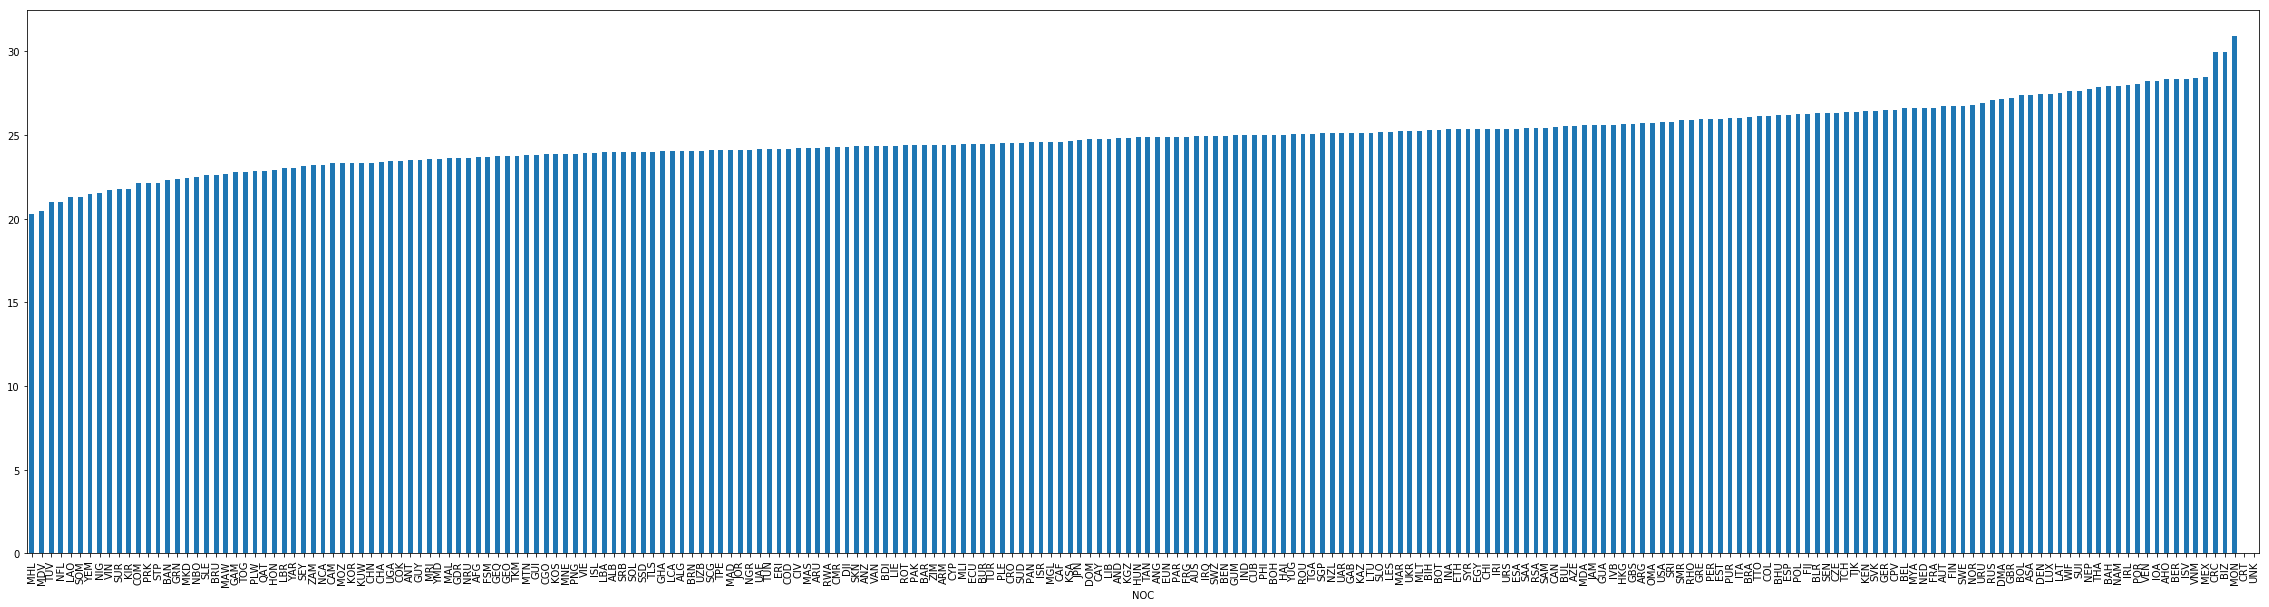

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['NOC','Year'])['Age'].mean().unstack()
new_df['Average'] = new_df.mean(axis=1)
new_df.sort_values(by='Average',inplace=True)
new_df = new_df['Average']
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Age for each game. For this, we will use the same method as above, grouping the resuting dataset by Games instead, before calculating mean Age for each group. The plot shows a fairly-similar mean Age for summer & winter Games. Also, pre-war games seem to have higher mean Age overall.

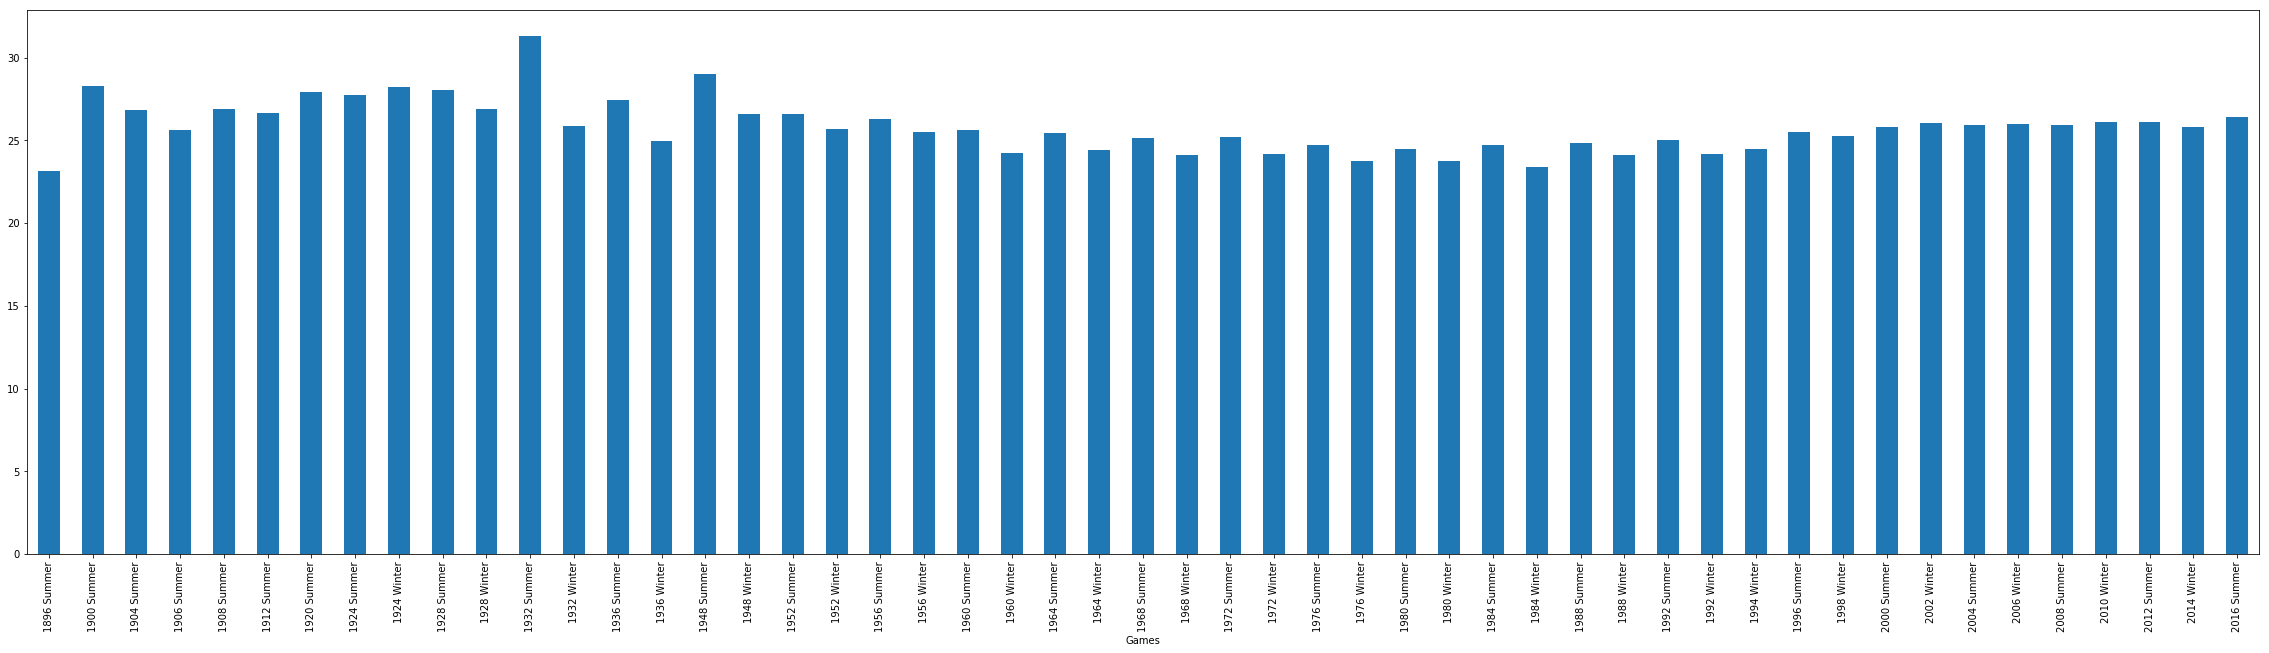

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Games'])['Age'].mean()
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Age for each Year. Again, using the same method as above results in duplicate names removed for each Year. The resulting dataset is then grouped by Year before calculating mean Age for each group. The plot shows a fairly-similar mean Age of around 25 over recent years. Noe that if the same athlete appears again in future years, he/she is considered a different unique individual.

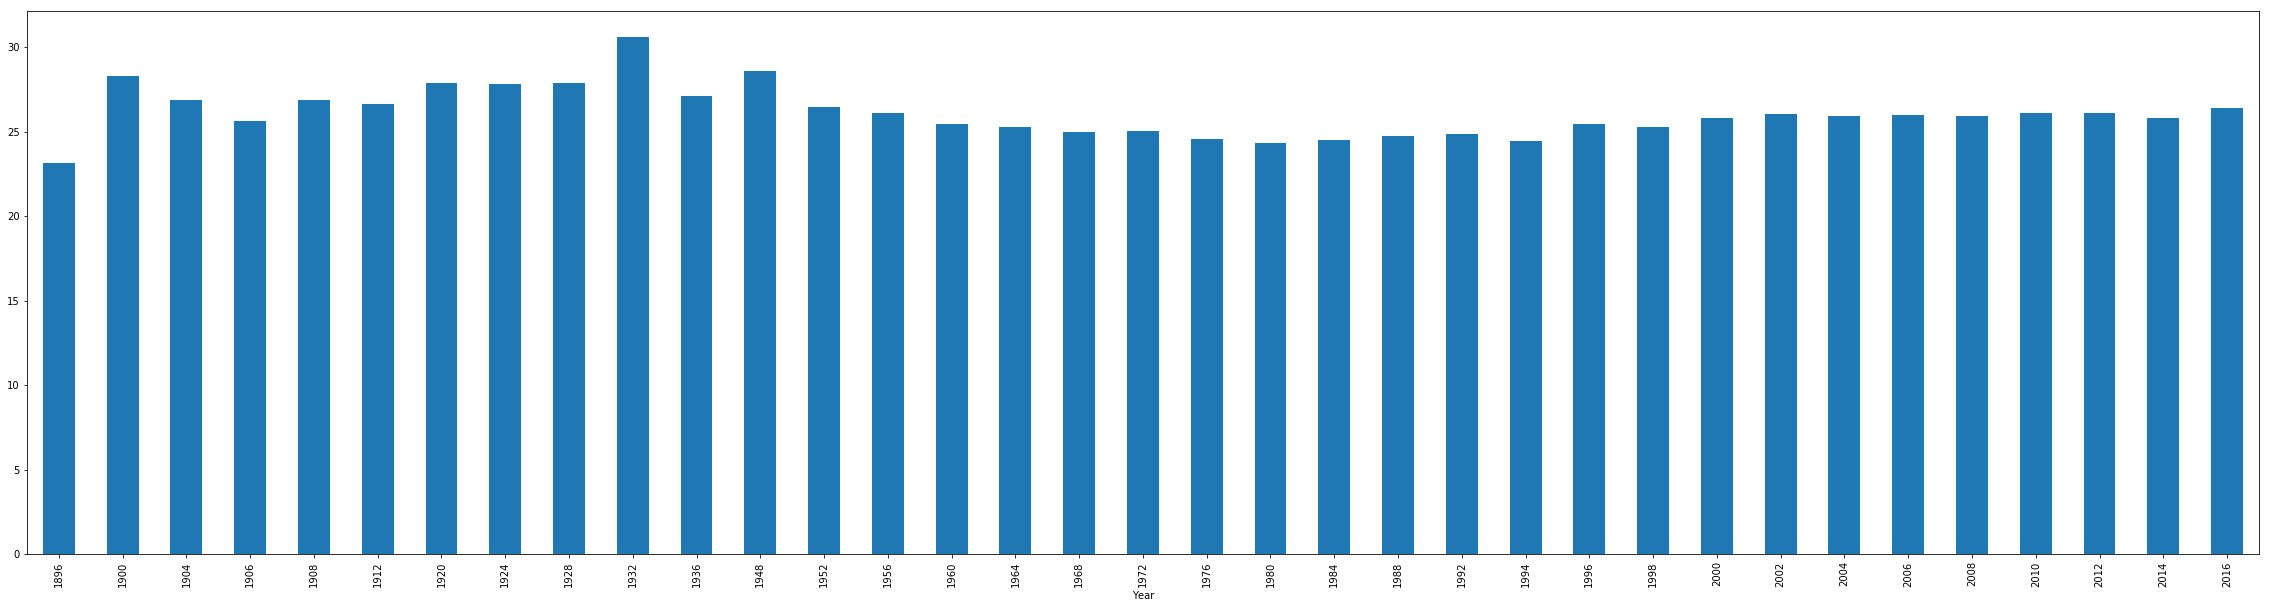

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Year'])['Age'].mean()
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Age for each Season. At this juncture, I'm allowing athletes to compete in both summer & winter Games for each Year. That is, 2 instances of each athlete can exist in the same Year provided they are in different Games. To achieve this, we employ the same method as above. This time, we group by Season before calculating mean Age for each group. The resulting plot shows a slightly-higher mean Age for summer Games.

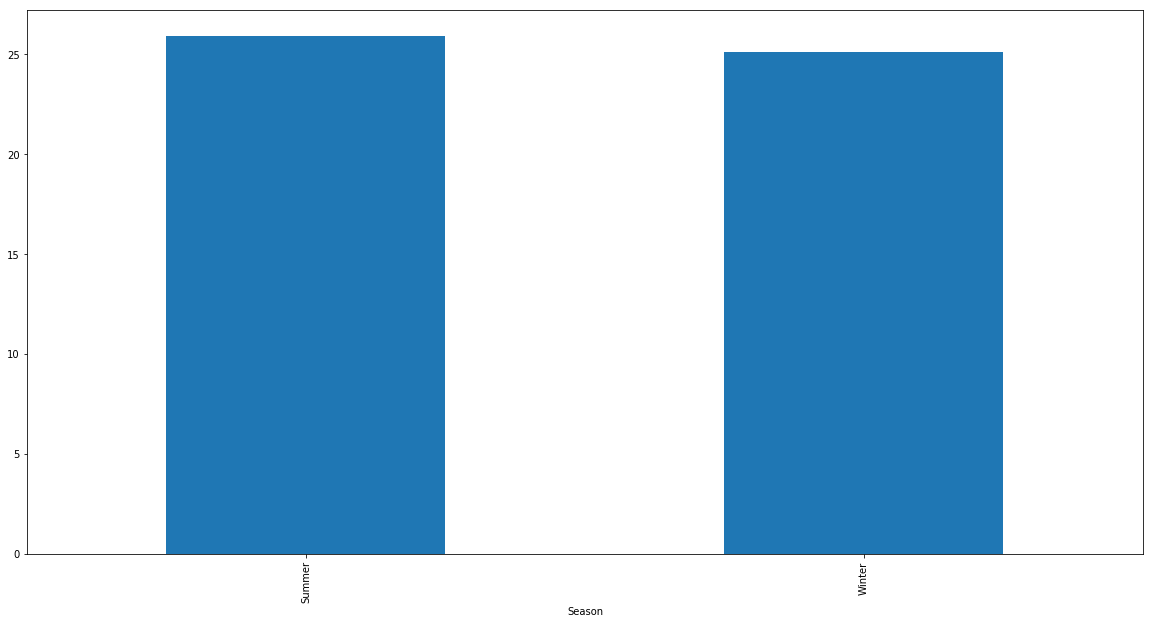

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Season'])['Age'].mean()
new_df.plot(kind='bar',figsize=(20,10))

Let's check mean Age for each City. Employing the same method, grouping by City & calculating their mean ages result in the following plot. Chamonix seems to have the highest mean Age.

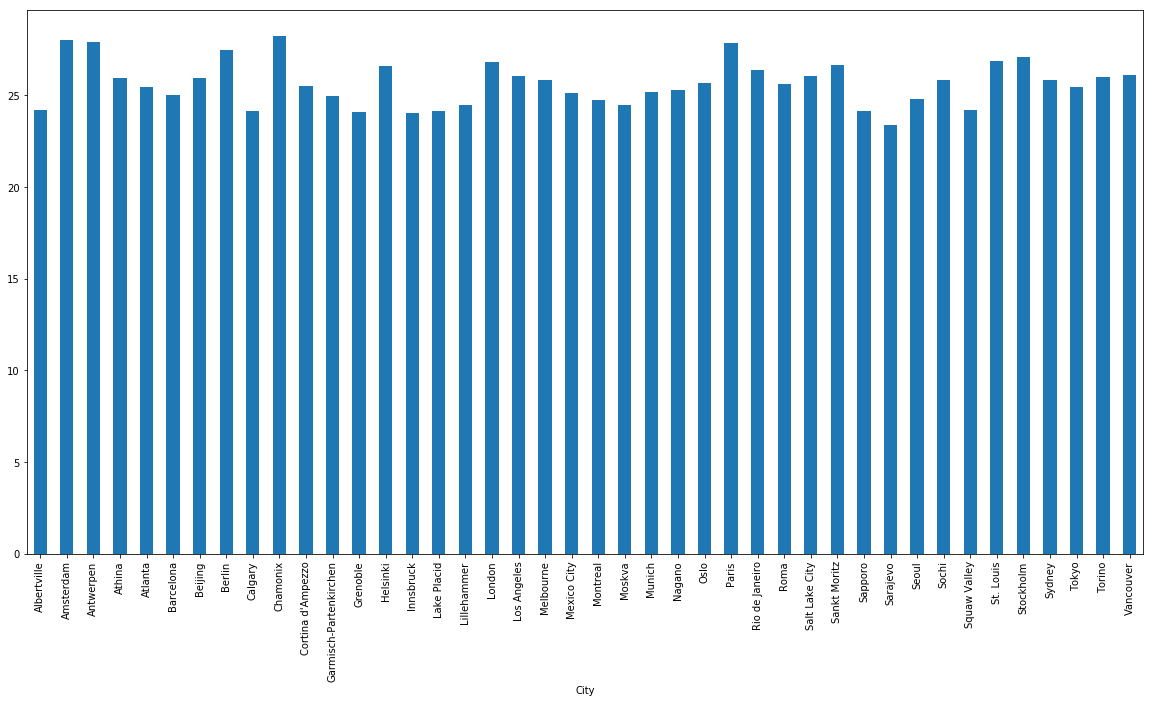

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['City'])['Age'].mean()
new_df.plot(kind='bar',figsize=(20,10))

We can calculate mean Age of athletes for each Sport. To do this, employ the same method to keep only unique Name-Age pairs. That is, if the same athlete competes in the Sport(but another Event), these appearances will be removed. Roque seems to have the highest mean Age while Rhythmic Gymnastics has the lowest mean Age.

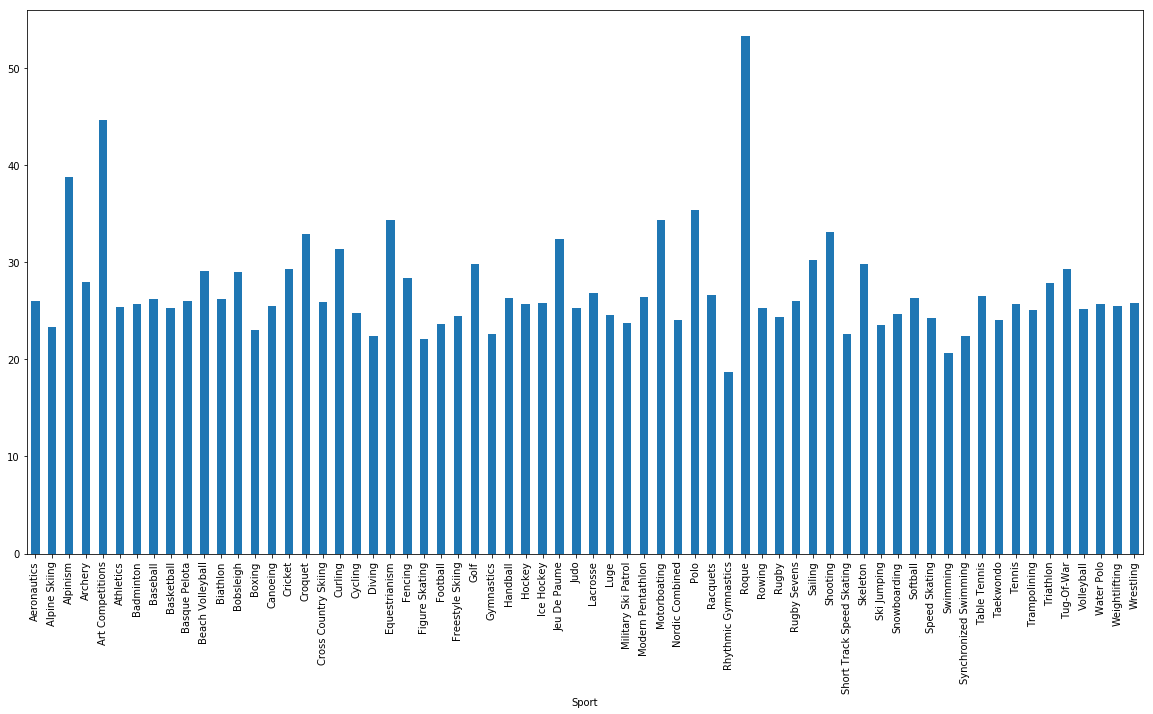

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Sport'])['Age'].mean()
new_df.plot(kind='bar',figsize=(20,10))

Let's check mean Age for each Event. It's not possible for athletes to participate multiple times in the same Event in the same Year so there's no need to remove any duplicate names here. We will group the data by Event & calculate their mean ages. Due to the sheer amount of events, I will only show the events with highest & lowest mean Age(Archery Women's Team Round,55 years old & Croquet Mixed Doubles,18.5 years old)

In [0]:
new_df = main.groupby(['Event'])['Age'].mean()
new_df[new_df==new_df.max()],new_df[new_df==new_df.min()] 

(Event
 Archery Women's Team Round    55.0
 Name: Age, dtype: float64, Event
 Croquet Mixed Doubles    18.5
 Name: Age, dtype: float64)

Finally, let's check the mean Age for each Medal type. I will allow the possibility of the same athlete winning multiple events in the same Year hence there's no need to remove any duplicate names. Interestingly, all of them have mean ages close to 26 & this may lead one to wonder if an athlete stands the best chance of a Medal only at that Age. 

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['Age'].mean()

Medal
Bronze    25.879210
Gold      25.901013
Silver    25.996724
Name: Age, dtype: float64

We check continuous variable Weight against Height. 

Scatterplot of Weight against Height. In fact, there's decent correlation between them. This might imply that a taller person may lead to a heavier person.

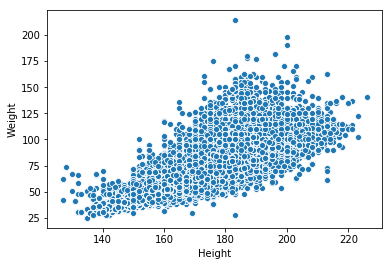

In [0]:
sns.scatterplot(x=main['Height'],y=main['Weight'])

Using NOC as represented country, We can calculate mean Height of athletes sent by countries over the years. To do this, we remove duplicate rows based on Name & Age. Repeating the explanation from earlier, this achieves the same effect as looping through each unique Year & keeping only the first instance of each athlete. The resulting dataset is grouped by NOC & Year before the mean Height for each group is calculated. To calculate average across all years for each NOC, we call mean function on axis=1(rows) and assign the values to a new column('Average'). Finally, the data is sorted by the Average values before plotting out the resulting barchart. Ignoring last 3 countries(due to null values), Serbia & Montenegro fields the tallest athletes by mean Height across all years.

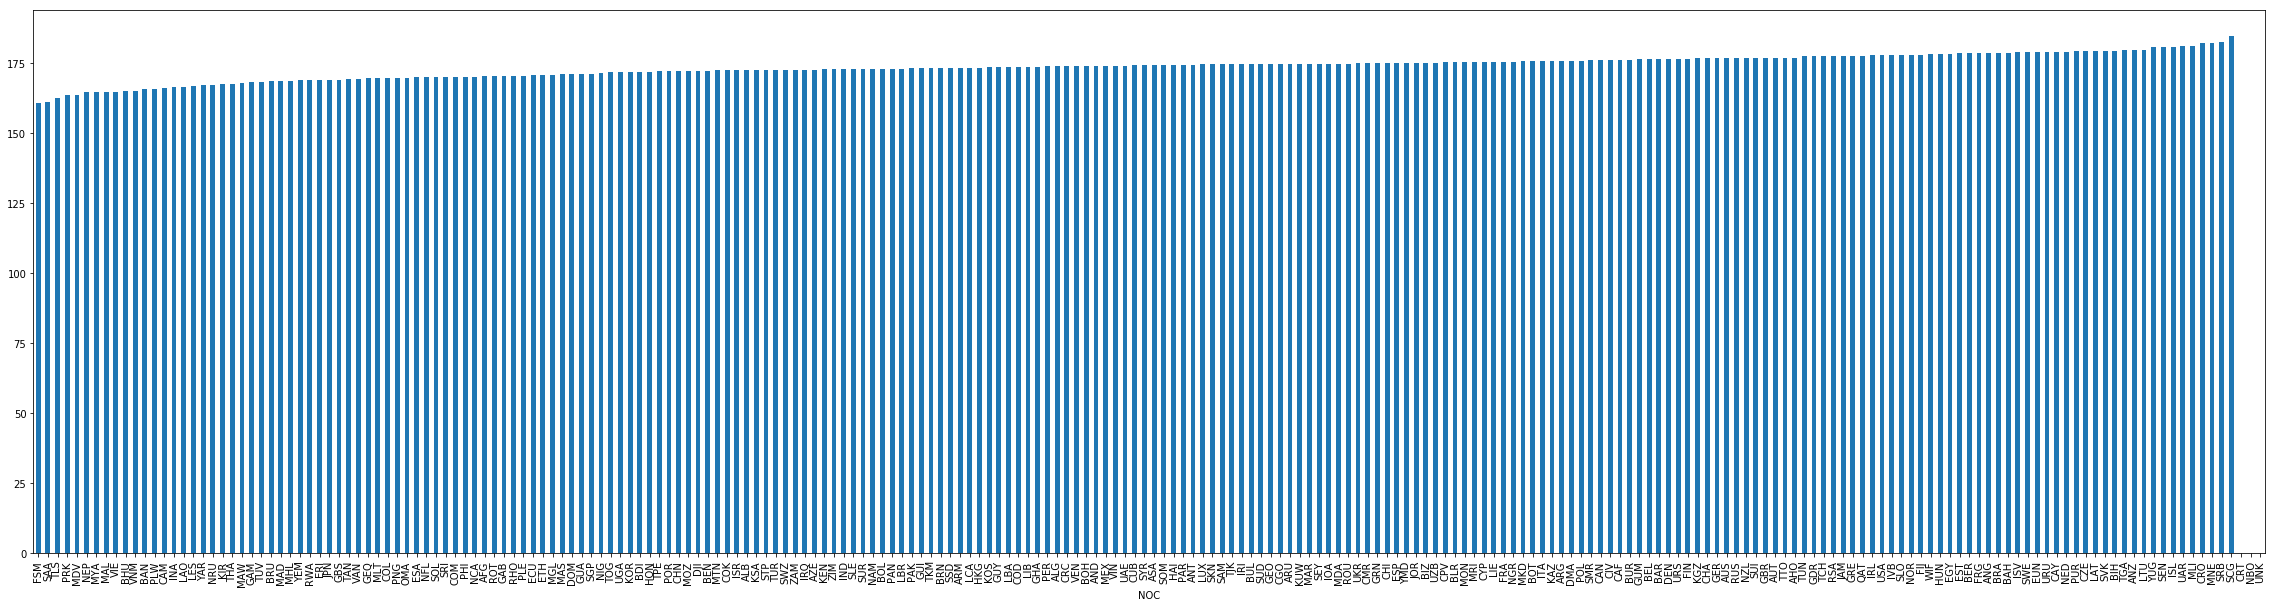

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['NOC','Year'])['Height'].mean().unstack()
new_df['Average'] = new_df.mean(axis=1)
new_df.sort_values(by='Average',inplace=True)
new_df = new_df['Average']
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Height for each game. For this, we will use the same method as above, grouping the resuting dataset by Games instead before calculating mean Height for each group. The plot shows a fairly-similar mean Height of 175 cm for summer & winter Games. 

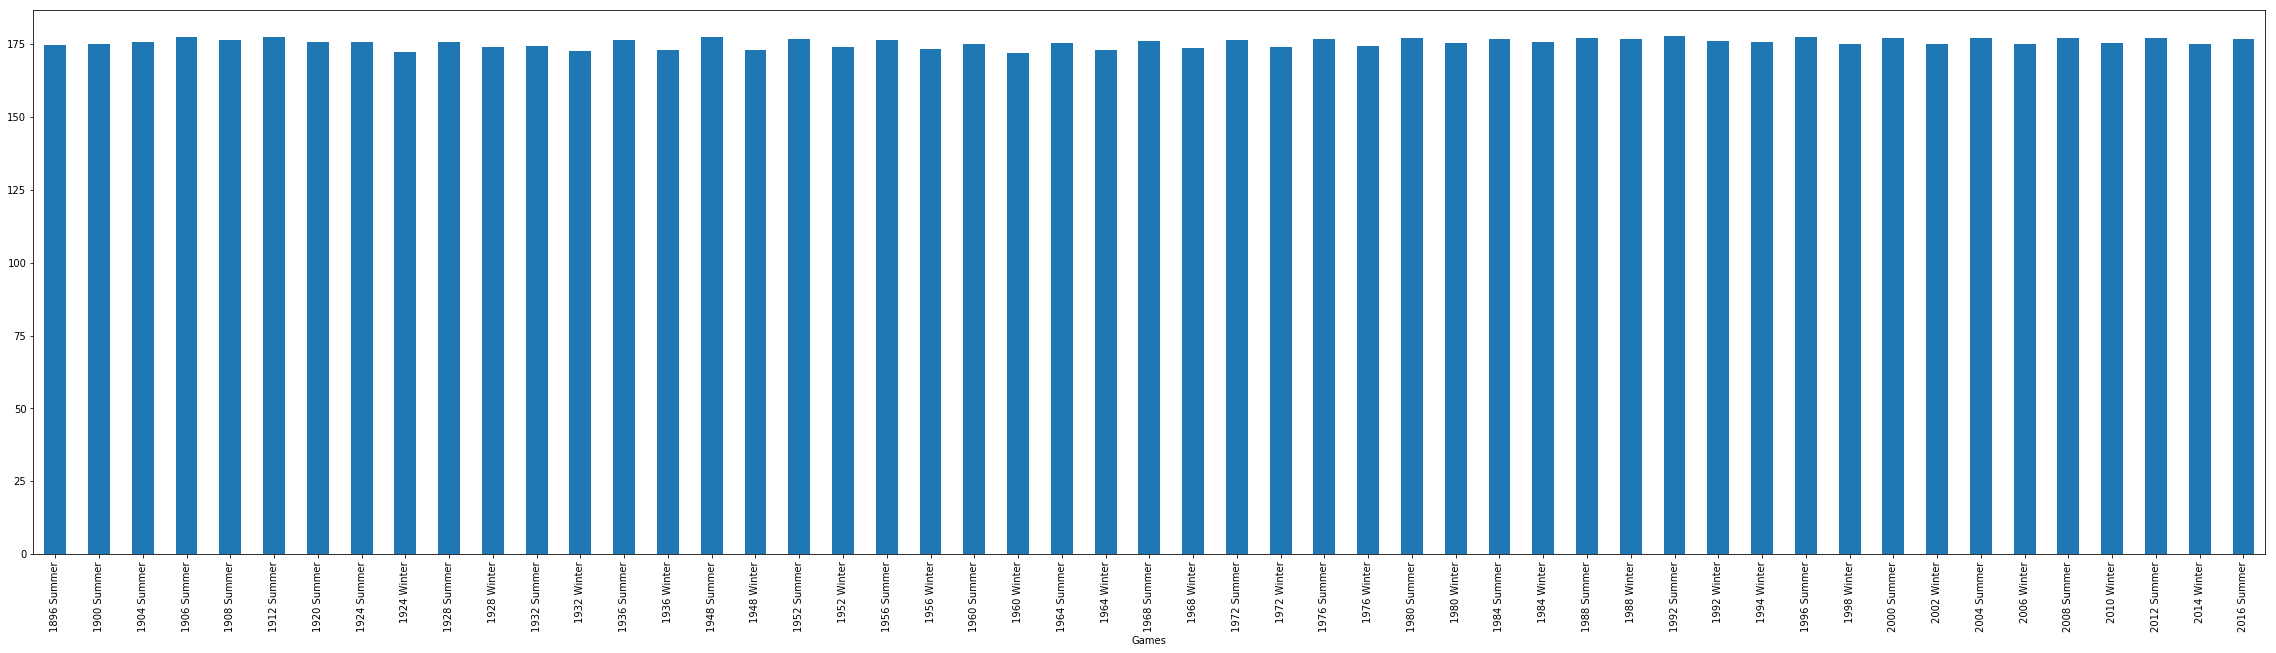

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Games'])['Height'].mean()
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Age for each Year. Again, using the same method as above results in duplicate names removed for each Year. The resulting dataset is then grouped by Year before calculating mean Age for each group. The plot shows a fairly-similar mean Age of around 25 over recent years.

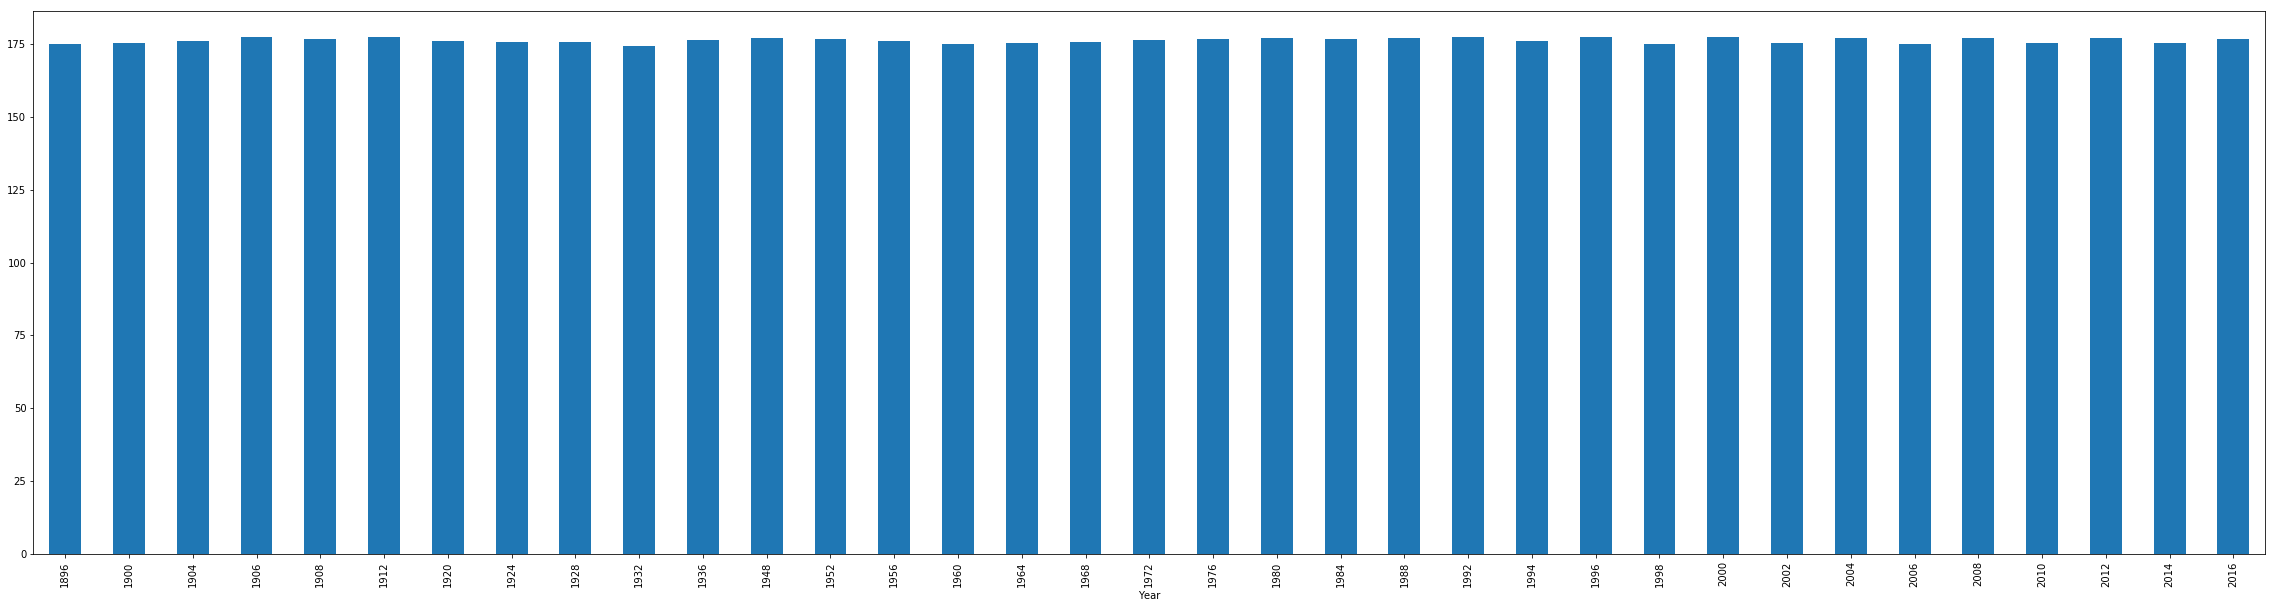

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Year'])['Height'].mean()
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Height for each Season. Similarly, 2 instances of each athlete can exist in the same Year provided they are in different Games. Using the same method yields a fairly-similar mean Height of 175 cm for both seasons.

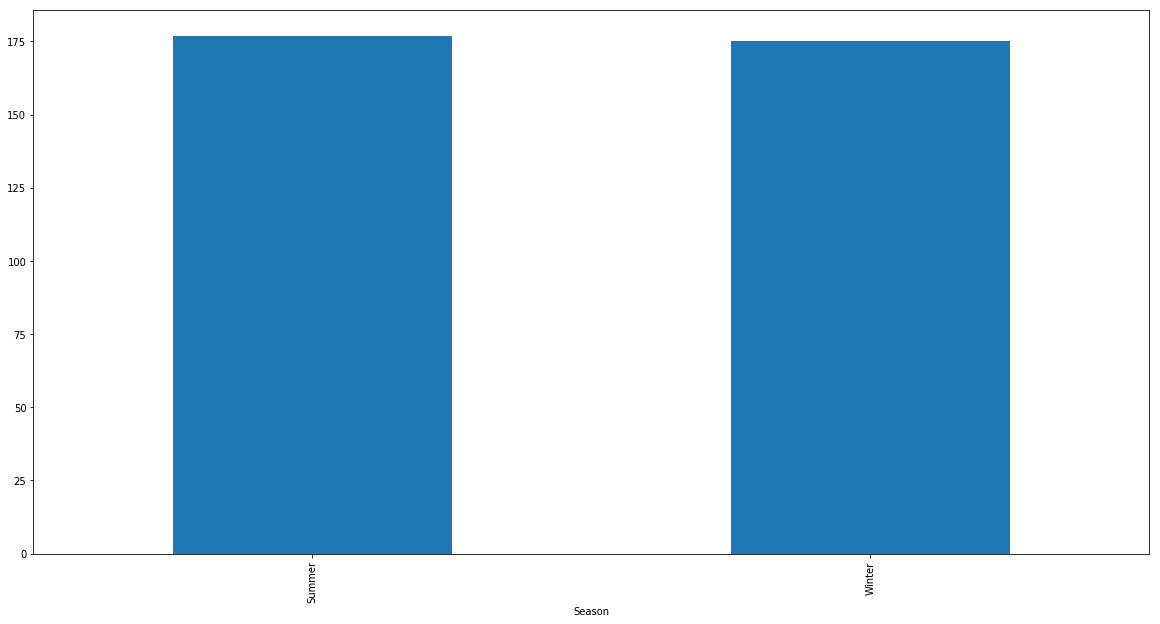

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Season'])['Height'].mean()
new_df.plot(kind='bar',figsize=(20,10))

Let's check mean Height for each City. Employing the same method, grouping by City & calculating their mean heights result in the following plot. Mean Height seems to be at 175 cm across all cities.

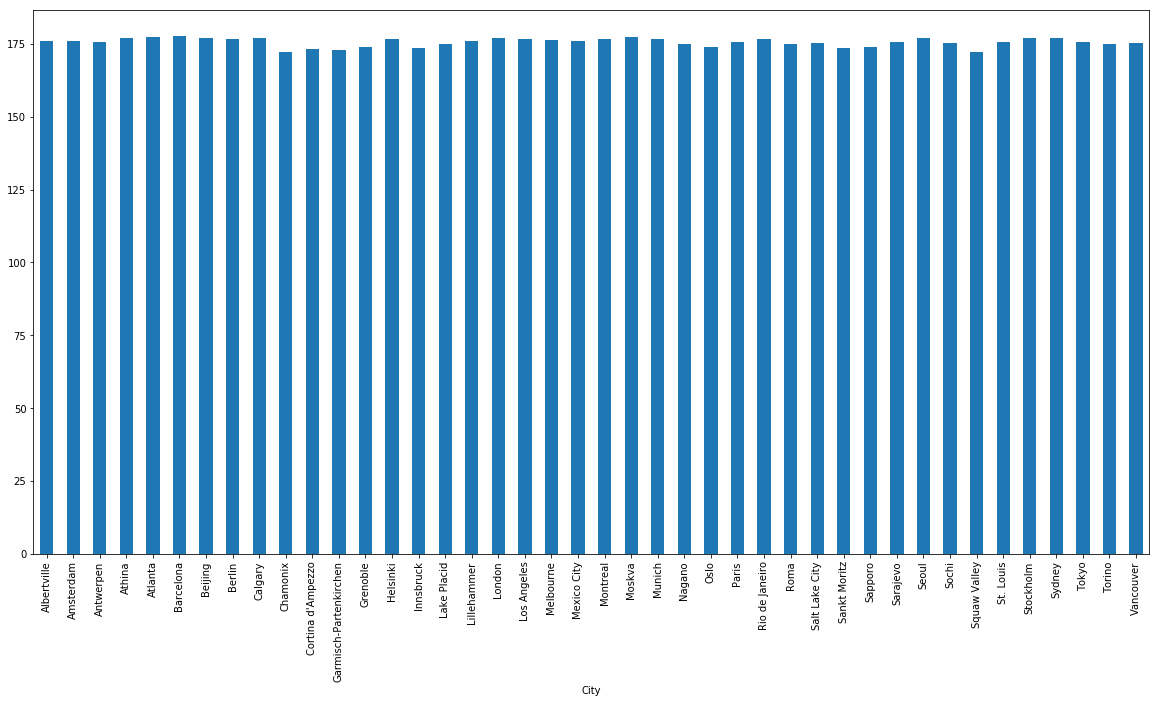

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['City'])['Height'].mean()
new_df.plot(kind='bar',figsize=(20,10))

We can calculate mean Height of athletes for each Sport. Again, no surprise here since most basketball professionals(especially those in NBA) are very tall. Note that those sports with only null values will have no mean heights shown. 

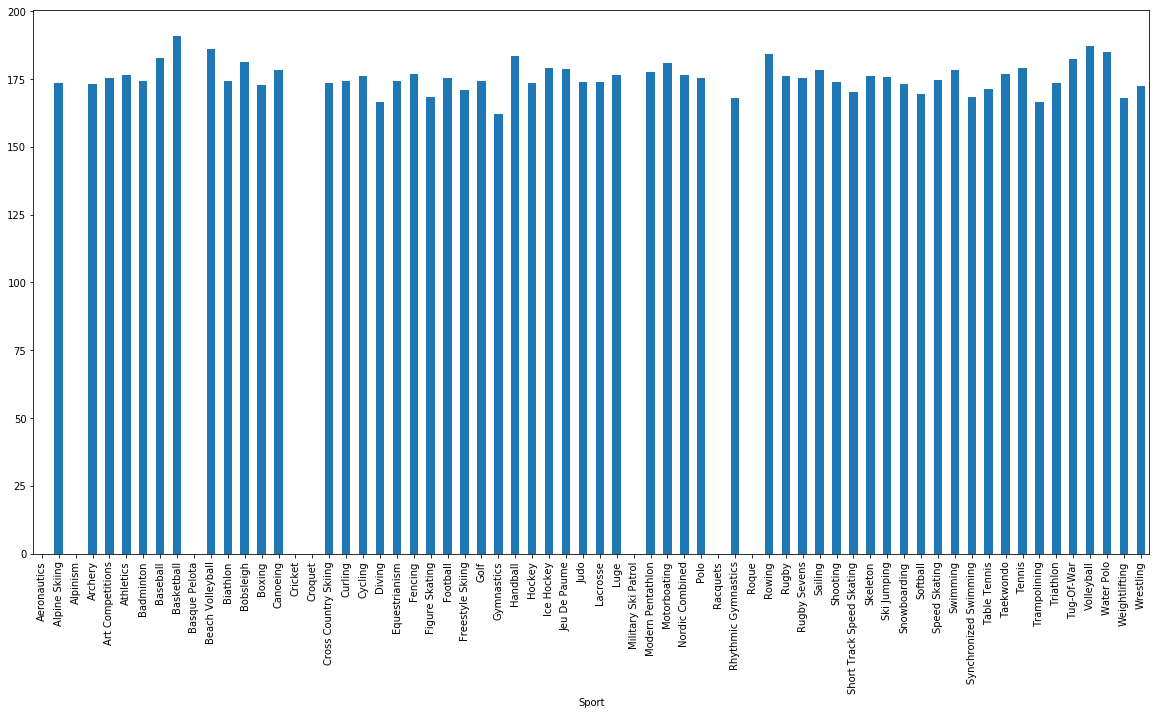

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Sport'])['Height'].mean()
new_df.plot(kind='bar',figsize=(20,10))

Let's check mean Height for each Event. Again, we won't be removing any duplicate names. We will group the data by Event & calculate their mean heights. Due to the sheer amount of events, I will only show the events with highest & lowest mean heights(Basketball Men's Basketball,195 cm & Weightlifting Women's Flyweight,151 cm). Event with highest mean Height should come as no surpise while Event with lowest mean Height is a flyweight Event where Weight limit of competitors is 52kg,hence implying a shorter overall Height given the strong correlation between Height & Weight(to be further shown by the correlation matrix at the end).

In [0]:
new_df = main.groupby(['Event'])['Height'].mean()
new_df[new_df==new_df.max()],new_df[new_df==new_df.min()] 

(Event
 Basketball Men's Basketball    194.872624
 Name: Height, dtype: float64, Event
 Weightlifting Women's Flyweight    150.530303
 Name: Height, dtype: float64)

Finally, let's check the mean Height for each Medal type. Again, allow the possibility of the same athlete winning multiple events in the same Year hence there's no need to remove any duplicate names. Interestingly, all of them have mean heights close to 178 cm & this may lead one to wonder if an athlete stands the best chance of a Medal only at that Height.

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['Height'].mean()

Medal
Bronze    177.298283
Gold      177.898472
Silver    177.458247
Name: Height, dtype: float64

Again, using NOC as represented Country, we can calculate mean Weight of athletes sent by countries over the years. Interestingly, a tiny island nation by the name of Nauru field the heaviest athletes.

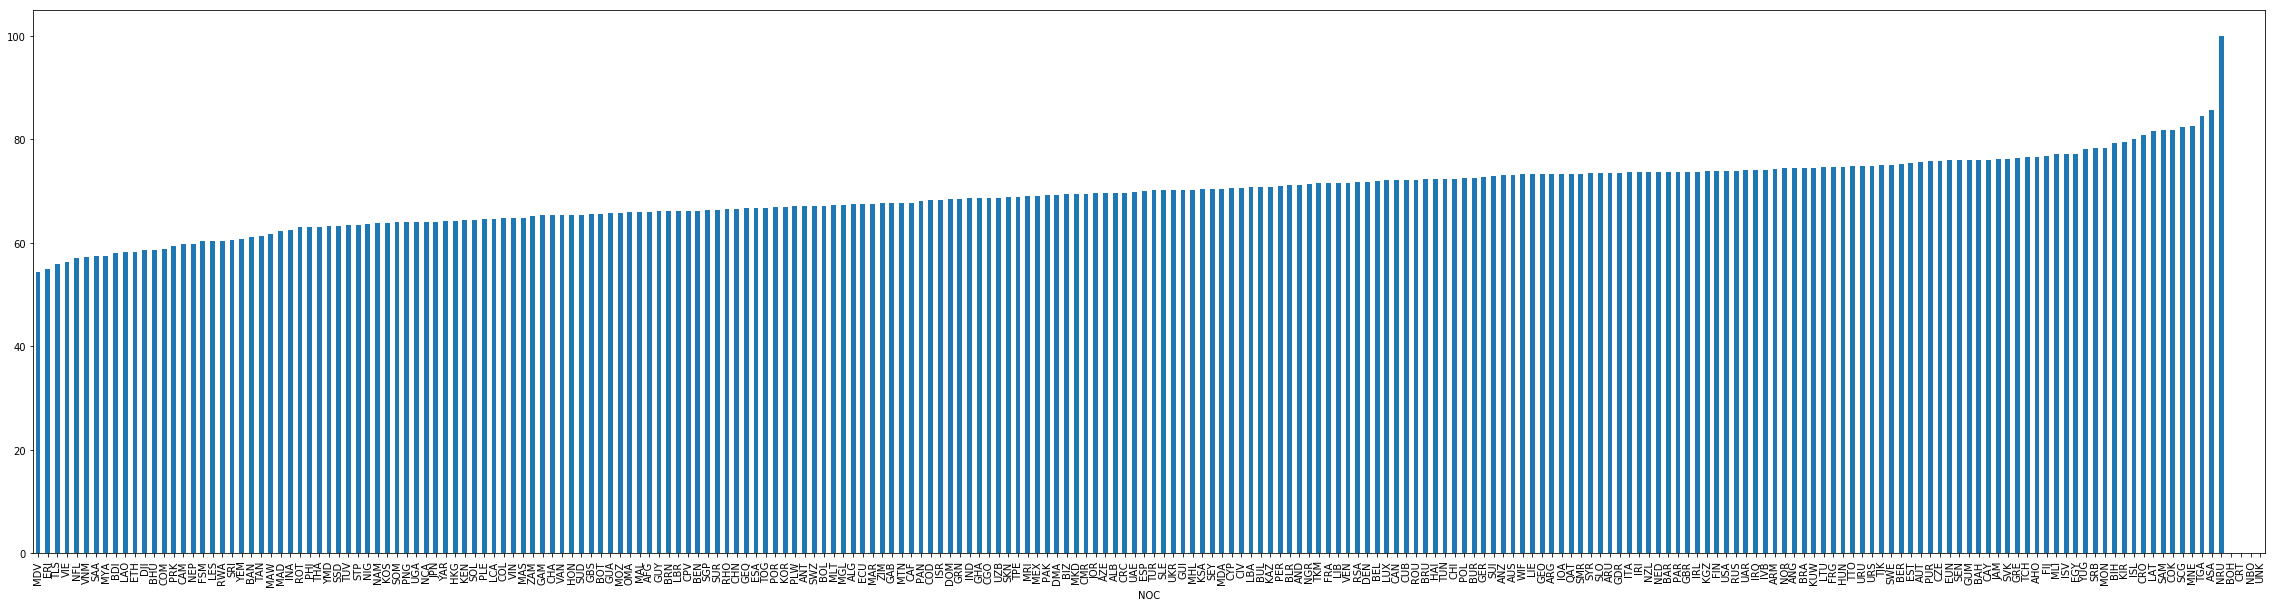

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['NOC','Year'])['Weight'].mean().unstack()
new_df['Average'] = new_df.mean(axis=1)
new_df.sort_values(by='Average',inplace=True)
new_df = new_df['Average']
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Weight for each game. For this, we want to remove any duplicate Name-Age pairs for each unique game. In fact, mean Weight remained fairly constant at around 70 kg.

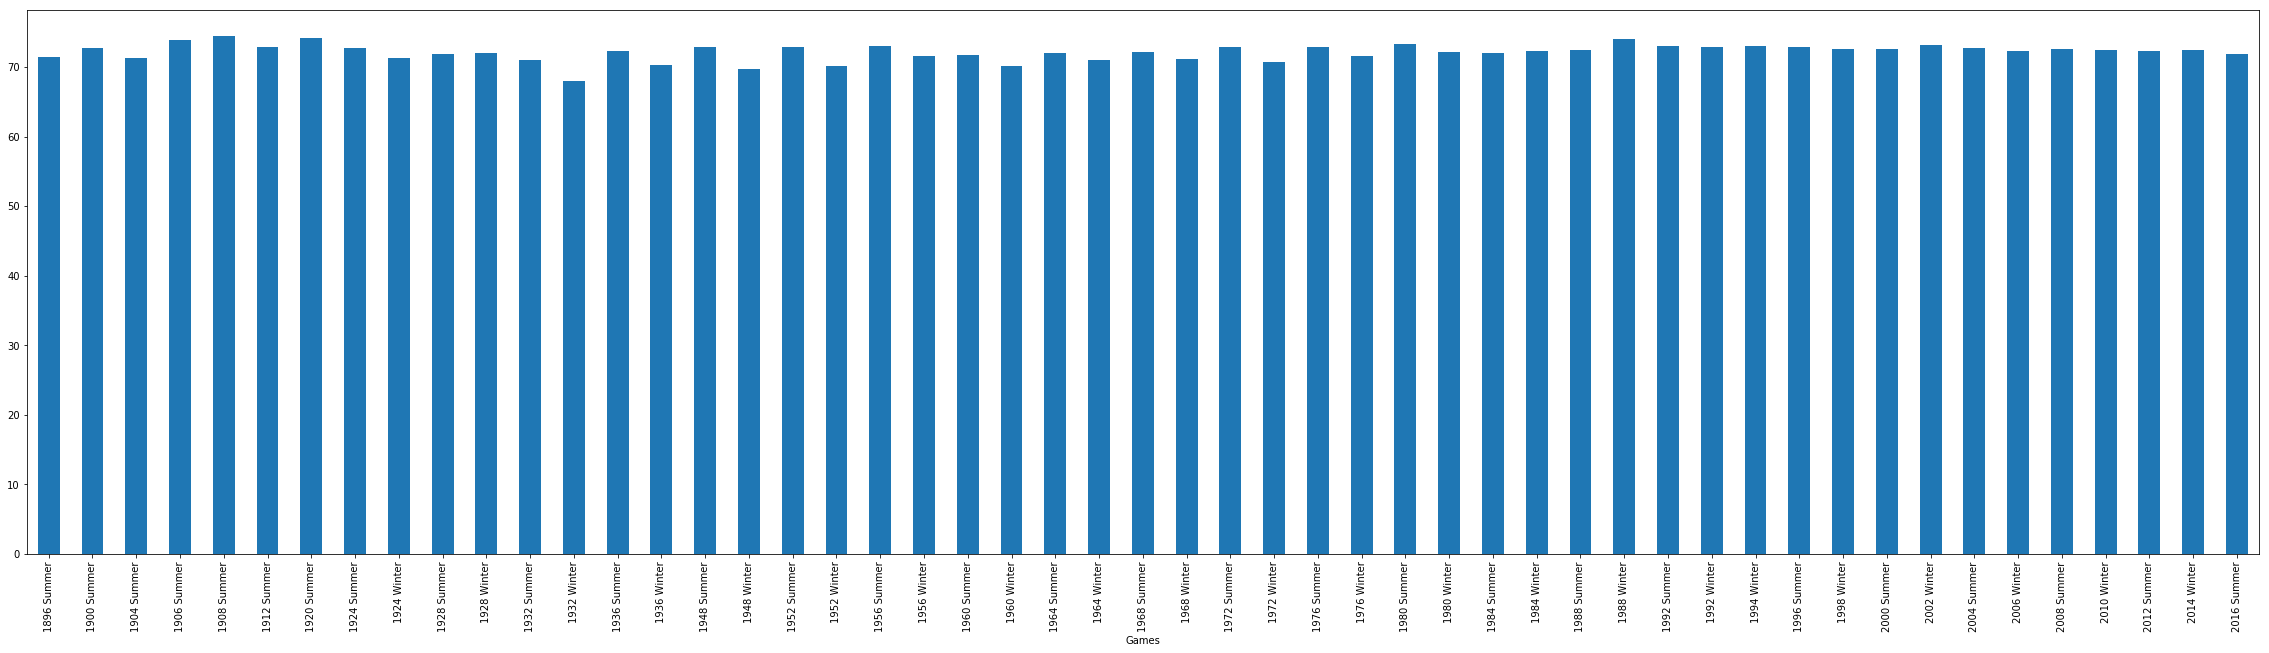

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Games'])['Weight'].mean()
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Weight for each Year. Again, using the same method as above results in duplicate Name-Age pairs removed for each Year. The resulting dataset is then grouped by Year before calculating mean Weight for each group. The plot shows a fairly-constant mean Weight of around 70 kg.

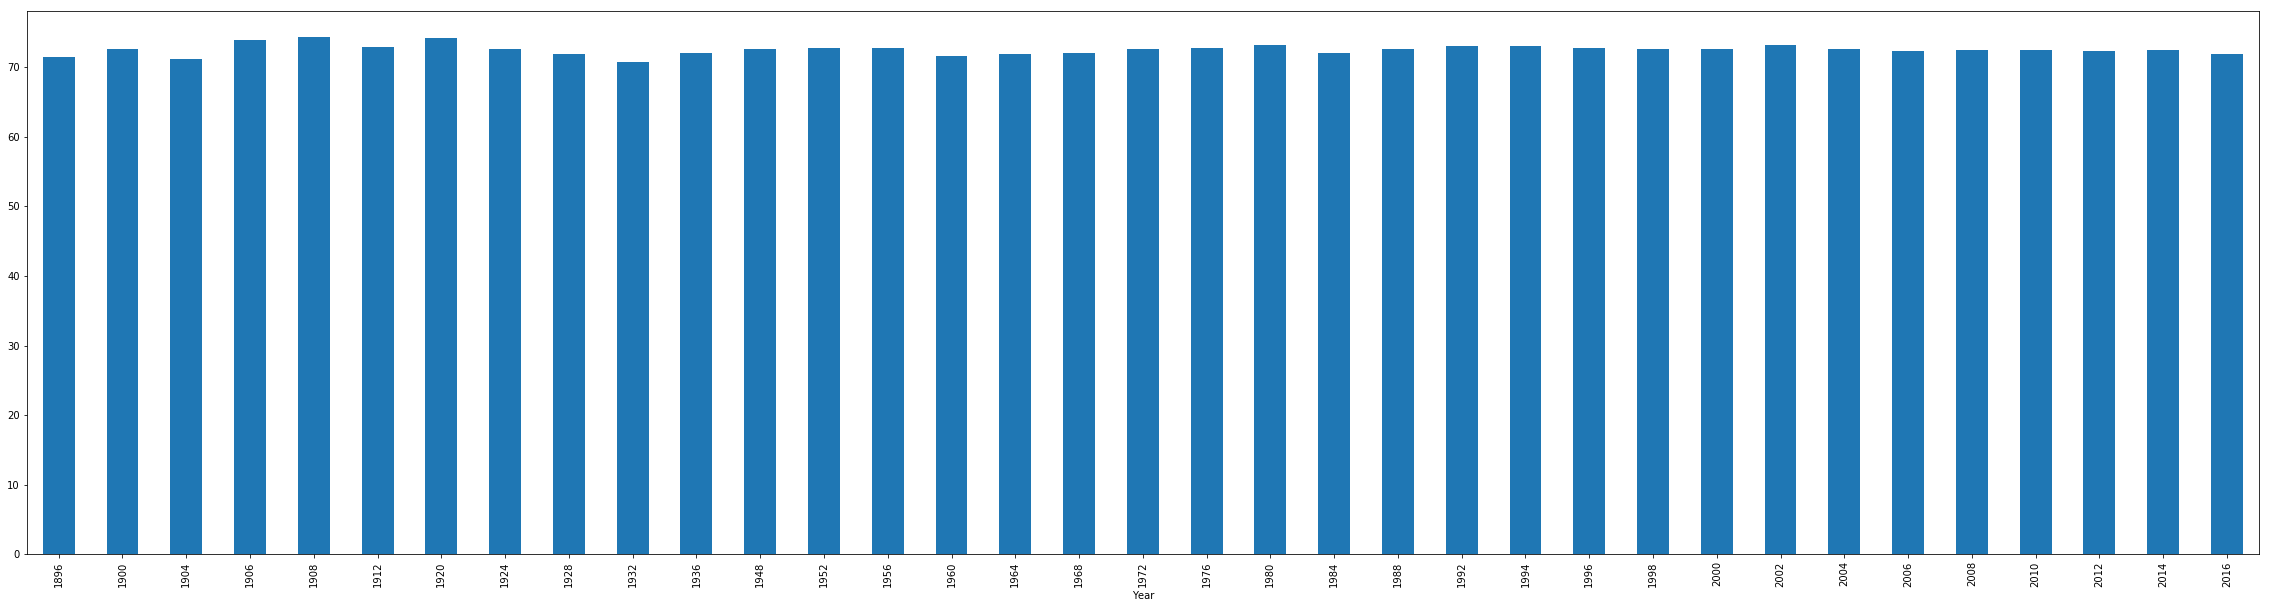

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Year'])['Weight'].mean()
new_df.plot(kind='bar',figsize=(40,10))

Let's check mean Weight for each Season. Similarly, 2 instances of each athlete can exist in the same Year provided they are in different Games. Again, not much difference between mean weights of the 2 seasons.

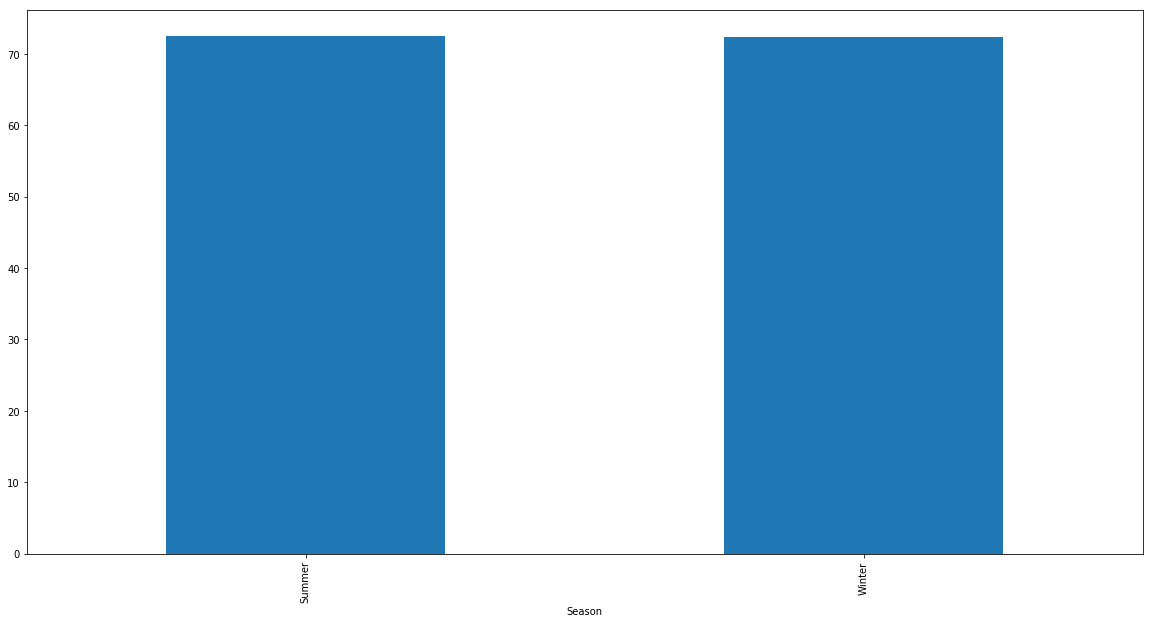

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Season'])['Weight'].mean()
new_df.plot(kind='bar',figsize=(20,10))

Let's check mean Weight for each city. We only consider the number of unique individuals for each City by removing duplicate Name-Age pairs for each unique City. The resulting data is then grouped by City & their mean weights are then calculated. Again, fairly-similar mean Weight of 70 kg across all cities.

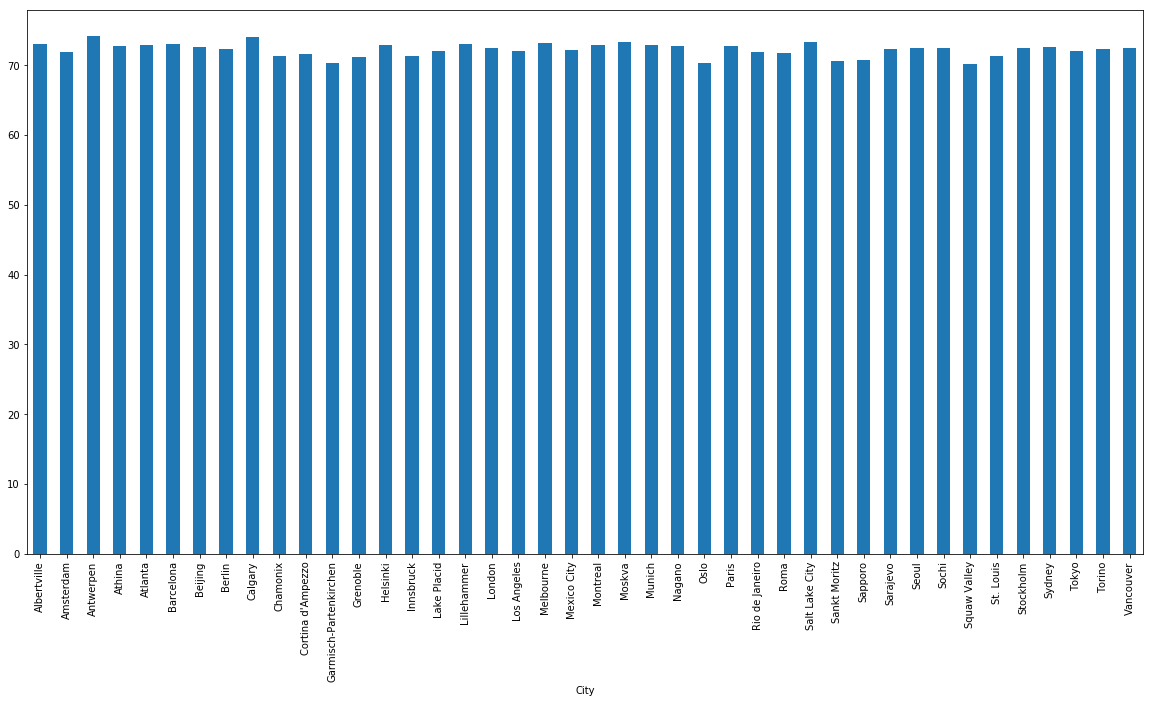

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['City'])['Weight'].mean()
new_df.plot(kind='bar',figsize=(20,10))

We can calculate mean Weight of athletes for each Sport. From the plot, Tug-Of-War has the highest mean Weight. This makes sense since most Tug-Of-War professionals need to be very heavy in order to stand a higher chance of winning. Note that those sports with only null values will have no mean weights shown.

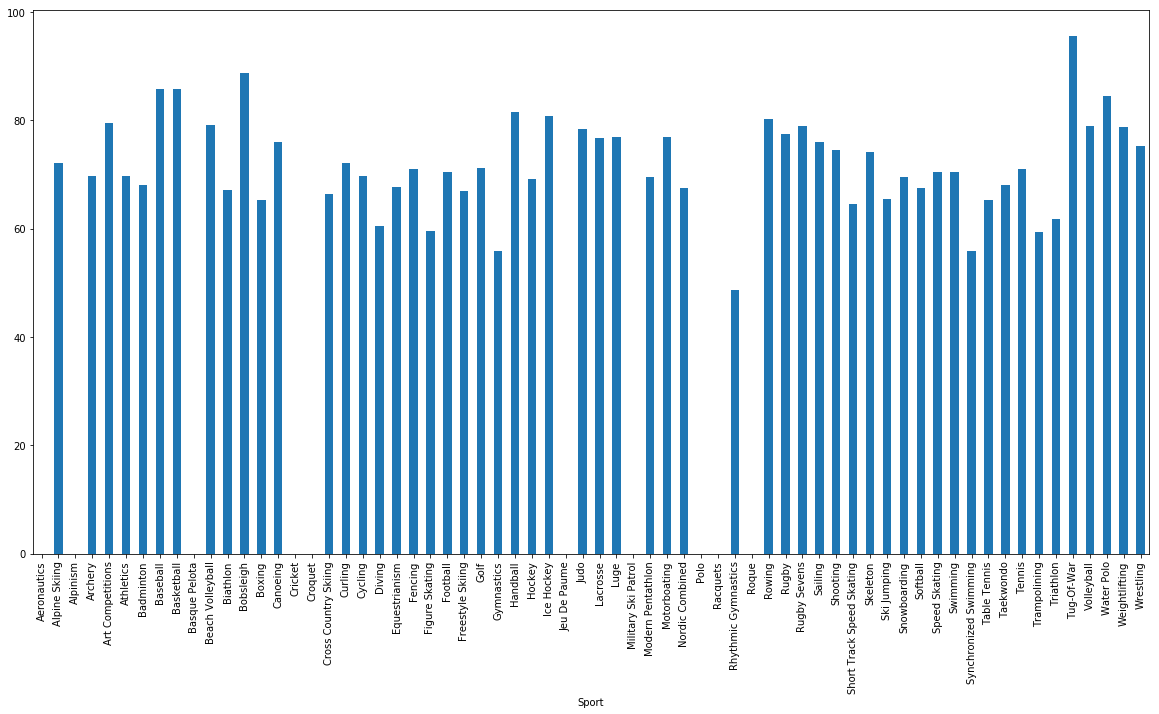

In [0]:
new_df = main.drop_duplicates(subset=['Name','Age'],keep='first').groupby(['Sport'])['Weight'].mean()
new_df.plot(kind='bar',figsize=(20,10))

Let's check mean Weight for each Event. Again, we won't be removing any duplicate names. We will group the data by Event & calculate their mean weights. Due to the sheer amount of events, I will only show the events with highest & lowest mean weights(Weightlifting Men's Super-Heavyweight ,135 kg & Gymnastics Women's Team All-Around,47 kg). Event with highest mean Weight should come as no surpise since super-heavyweight implies a weight limit of at least 100 kg. Perhaps a lower Weight implies a higher chance of winning in Rhythmic Gymnastics.

In [0]:
new_df = main.groupby(['Event'])['Weight'].mean()
new_df[new_df==new_df.max()],new_df[new_df==new_df.min()] 

(Event
 Weightlifting Men's Super-Heavyweight    135.408629
 Name: Weight, dtype: float64, Event
 Gymnastics Women's Team All-Around    47.322404
 Name: Weight, dtype: float64)

Finally, let's check the mean Weight for each Medal type. Again, allow the possibility of the same athlete winning multiple events in the same Year hence there's no need to remove any duplicate names. Interestingly, all of them have mean weights close to 74 kg & this may lead one to wonder if an athlete stands the best chance of a Medal only at that Weight.

In fact, combining our findings for Age, Height & Weight seem to suggest that athletes aged 26 years old, 178 cm tall & weighing 74 kg stand the highest chance of winning medals.

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['Weight'].mean()

Medal
Bronze    73.479010
Gold      74.183879
Silver    73.644962
Name: Weight, dtype: float64

Has the number of participating countries increased over the years for each game? Let's check unique NOC count for each game. For this, we can group the data by Games before counting number of unique NOCs for each group. The resulting plot shows a overall increasing trend in participating countries over the years.

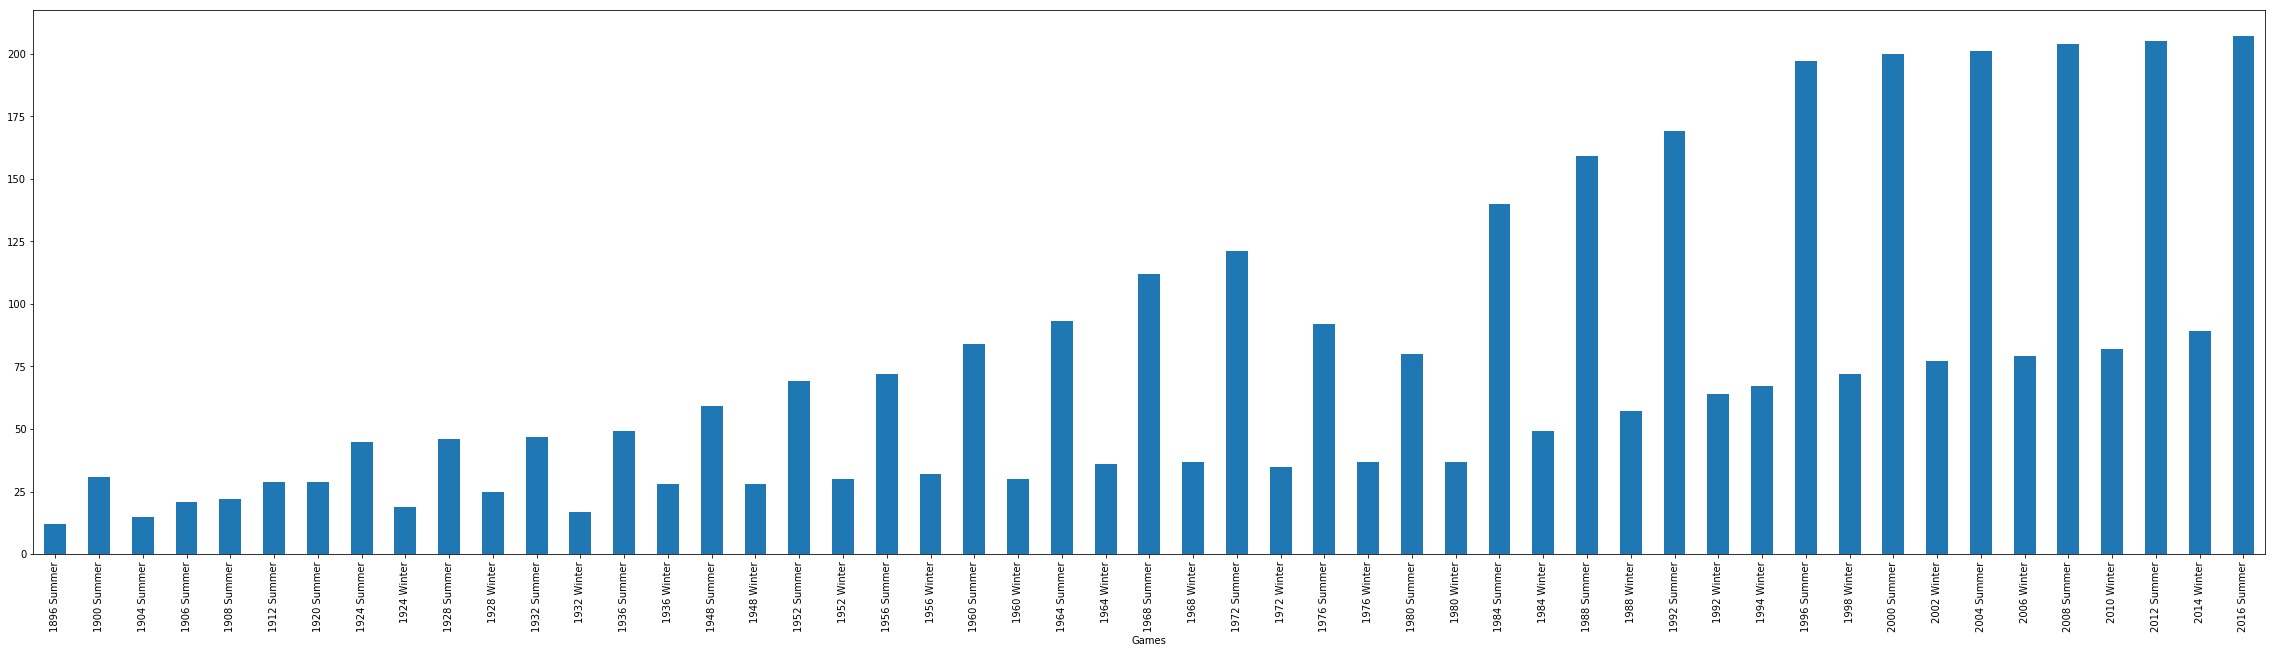

In [0]:
new_df = main.groupby(['Games'])['NOC'].nunique()
new_df.plot(kind='bar',figsize=(40,10))

Let's check unique NOC for each Year. We can achieve this by grouping the dataset by Year before counting unique NOC for each group. Note that there's a steady increase in participating countries from 1924-1992. For the remaining years before 1924, there are only summer Games. After 1992, winter & summer Games are staggered by 2 years which explains the strange pattern of increasing & decreasing count from Year to Year.

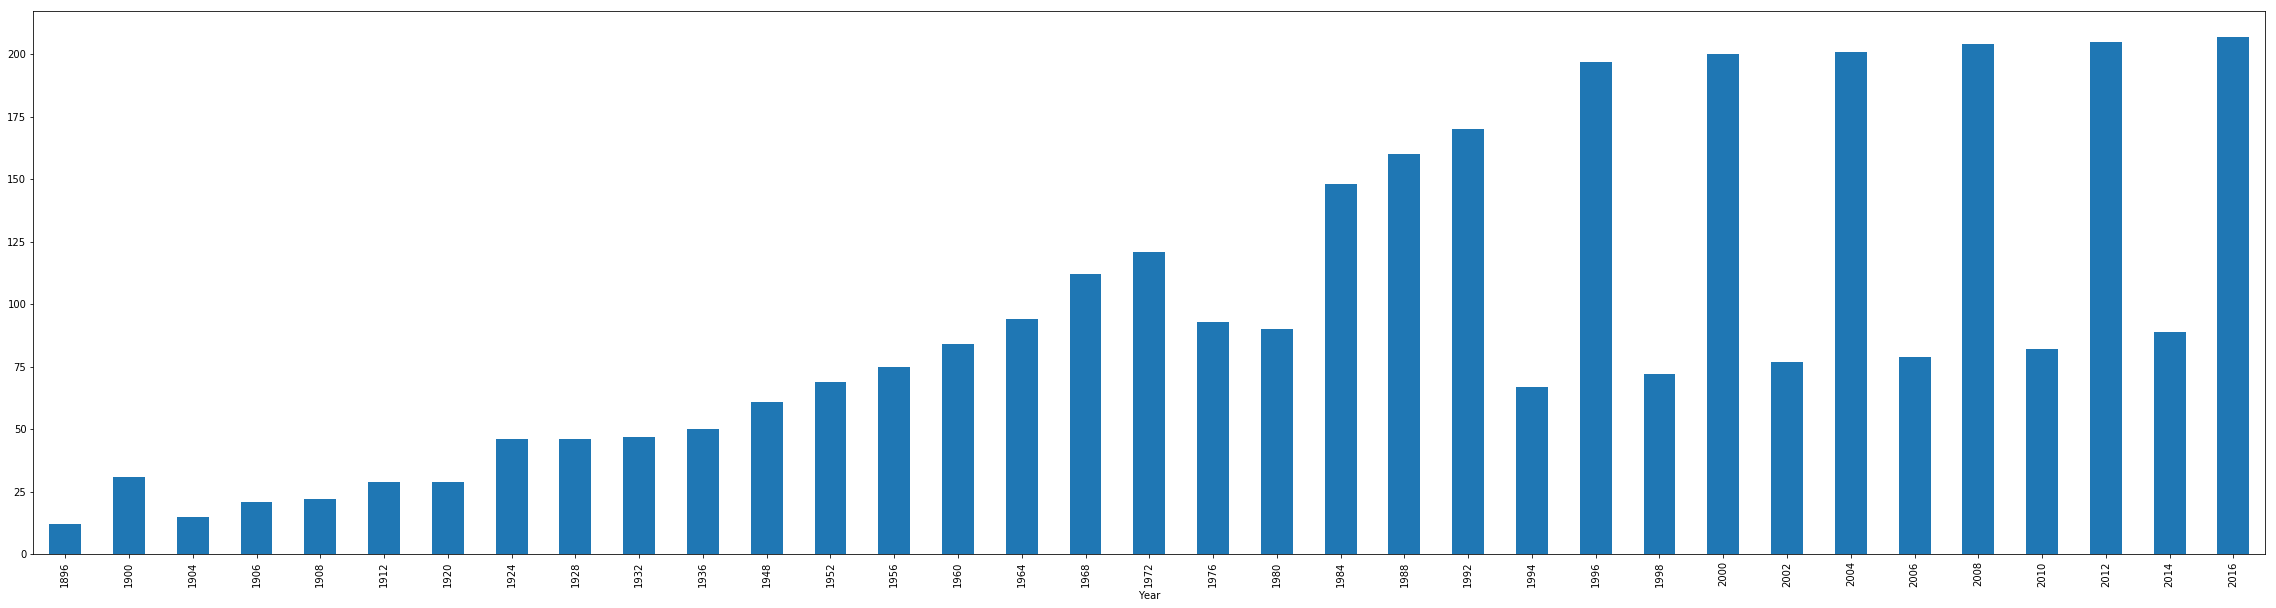

In [0]:
new_df = main.groupby(['Year'])['NOC'].nunique()
new_df.plot(kind='bar',figsize=(40,10))

Let's check number of participating countries for each Season. Again, a simple grouping by Season followed by NOC unique count reveals a much-higher participation for summer Games compared to winter Games.

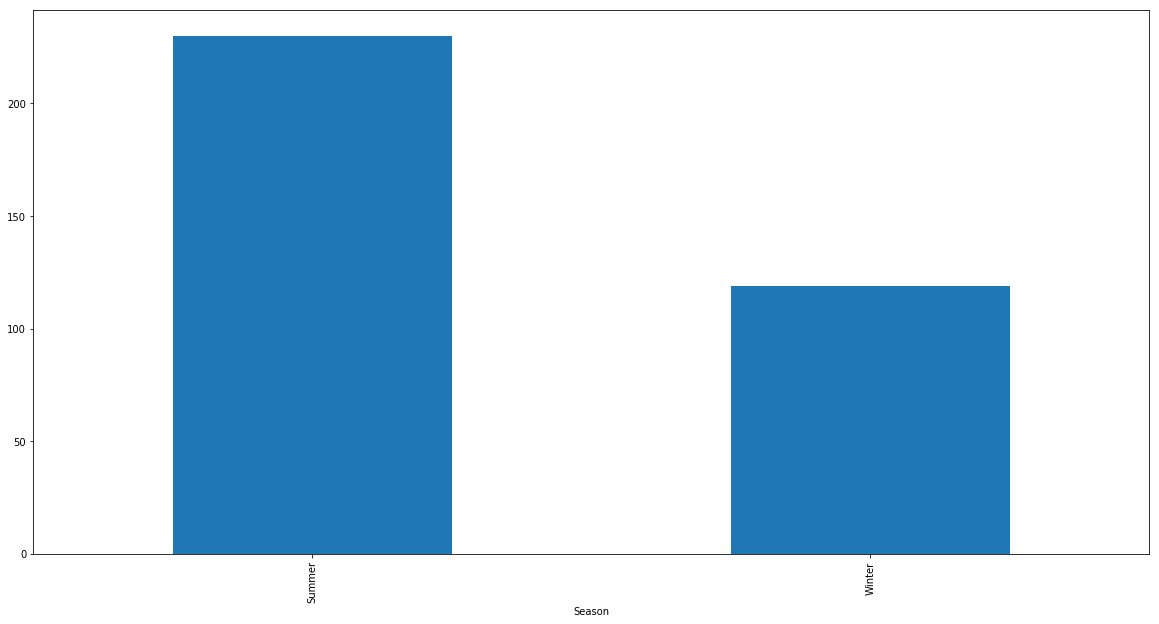

In [0]:
new_df = main.groupby(['Season'])['NOC'].nunique()
new_df.plot(kind='bar',figsize=(20,10))

Let's check number of participating countries for each unique City. Employing the same method reveals London as having the highest unique participating countries. In fact, taking a unique count of Year for City=='London' reveals that London has actually been a venue for 3 years(1908,1948,2012).

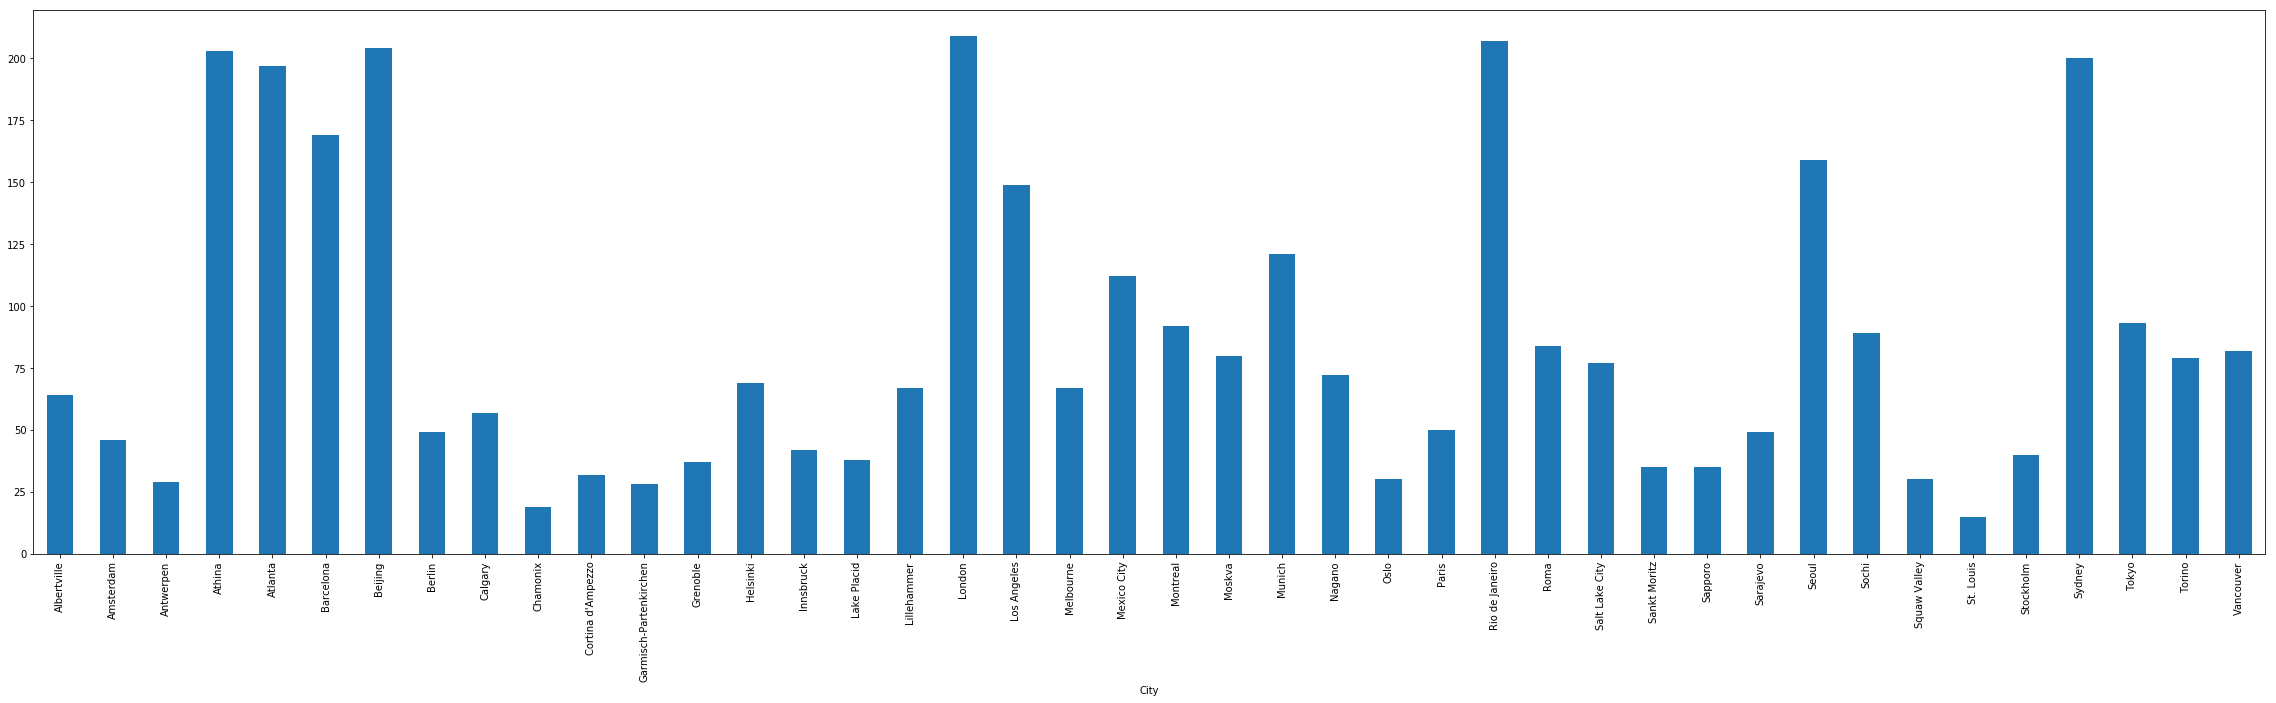

In [0]:
new_df = main.groupby(['City'])['NOC'].nunique()
new_df.plot(kind='bar',figsize=(40,10))

Let's check number of participating countries by Sport. The resulting plot reveals Athletics as having the highest NOC participation.

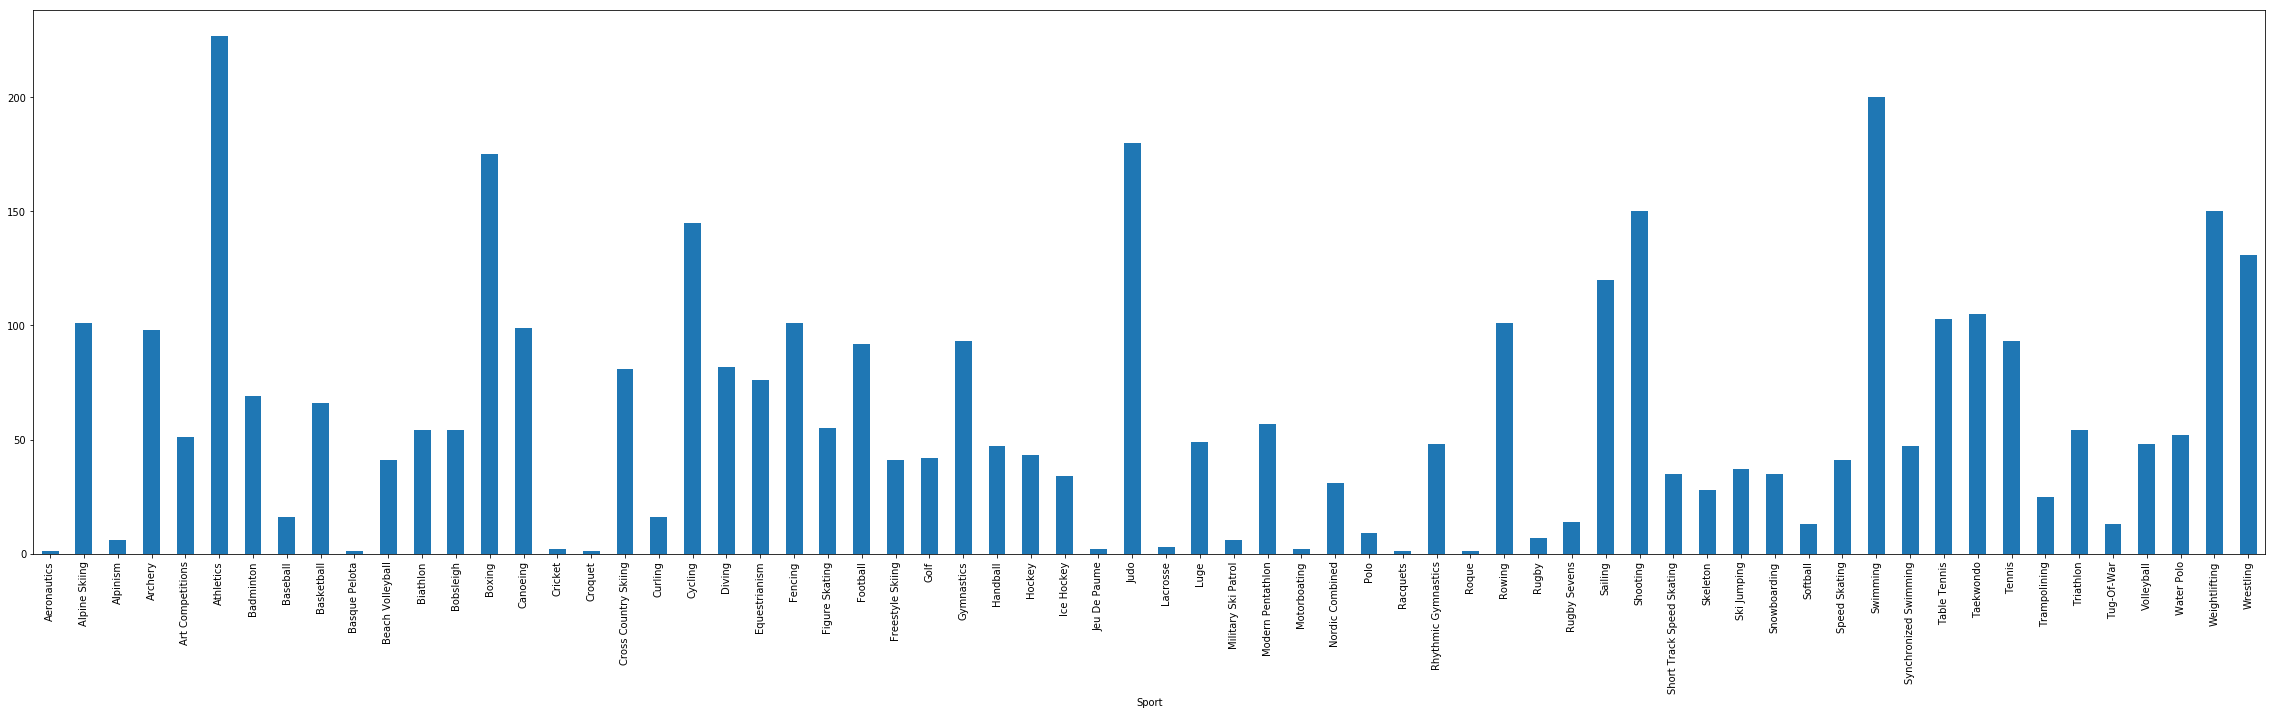

In [0]:
new_df = main.groupby(['Sport'])['NOC'].nunique()
new_df.plot(kind='bar',figsize=(40,10))

Let's check number of participating countries by Event. Athletics Men's 100 metres is the most-popular Event while there are a number of Events with only 1 participating country. In fact, these are not errors. Checking for some of these events do reveal that only athletes from the same country are vying for the medals.

In [0]:
new_df = main.groupby(['Event'])['NOC'].nunique()
new_df[new_df==new_df.max()],new_df[new_df==new_df.min()] 

(Event
 Athletics Men's 100 metres    194
 Name: NOC, dtype: int64, Event
 Aeronautics Mixed Aeronautics                          1
 Archery Men's Double American Round                    1
 Archery Men's Pole Archery, Large Birds, Individual    1
 Archery Men's Pole Archery, Large Birds, Team          1
 Archery Men's Pole Archery, Small Birds, Individual    1
 Archery Men's Pole Archery, Small Birds, Team          1
 Archery Men's Team Round                               1
 Archery Men's Unknown Event                            1
 Archery Women's Double Columbia Round                  1
 Archery Women's Team Round                             1
 Basque Pelota Men's Two-Man Teams With Cesta           1
 Croquet Mixed Doubles                                  1
 Croquet Mixed Singles, One Ball                        1
 Croquet Mixed Singles, Two Balls                       1
 Cycling Men's 1 mile                                   1
 Cycling Men's 1/2 mile                                 

Let's check number of participating countries for each Medal type. Gold Medal has the least number of distinct country recipients while Bronze & Silver are almost similar(125 & 128).

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['NOC'].nunique()

Medal
Bronze    125
Gold      109
Silver    128
Name: NOC, dtype: int64

Let's check number of Games held for each Season. Grouping the data by Season & counting unique Year for each group yields the resulting plot showing a higher number of summer Games compared to winter Games which should come as no surprise since winter Games only existed from 1924 onwards. 

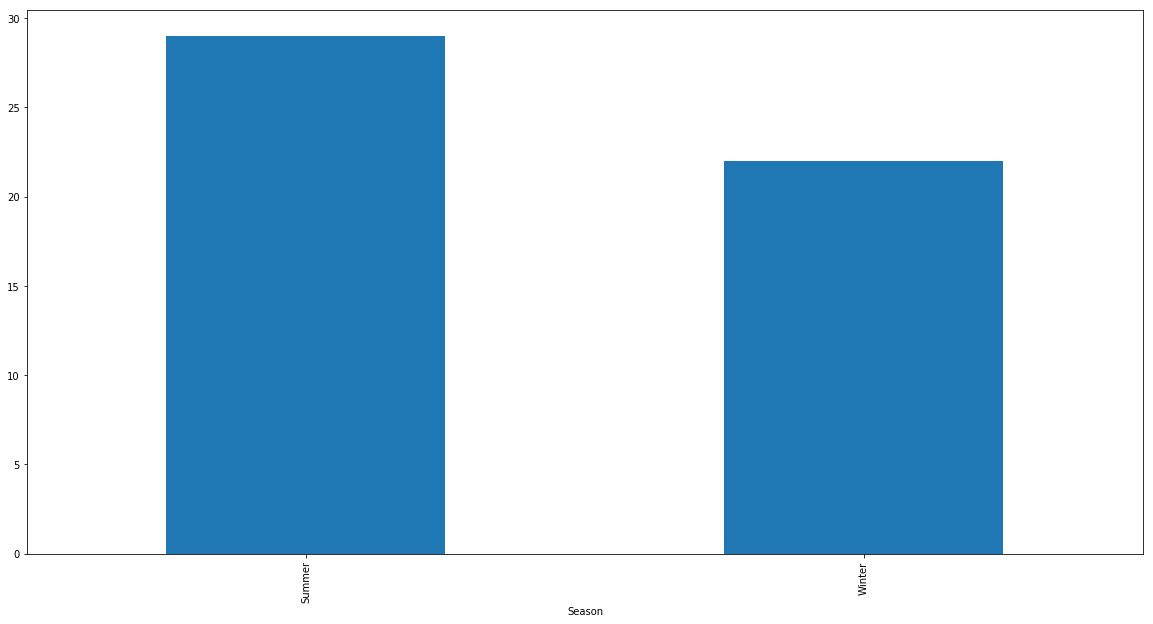

In [0]:
new_df = main.groupby(['Season'])['Year'].nunique()
new_df.plot(kind='bar',figsize=(20,10))

Let's check number of times a City has been selected as a venue. In fact, this can be used to explain why some cities have higher number of distinct participating countries.

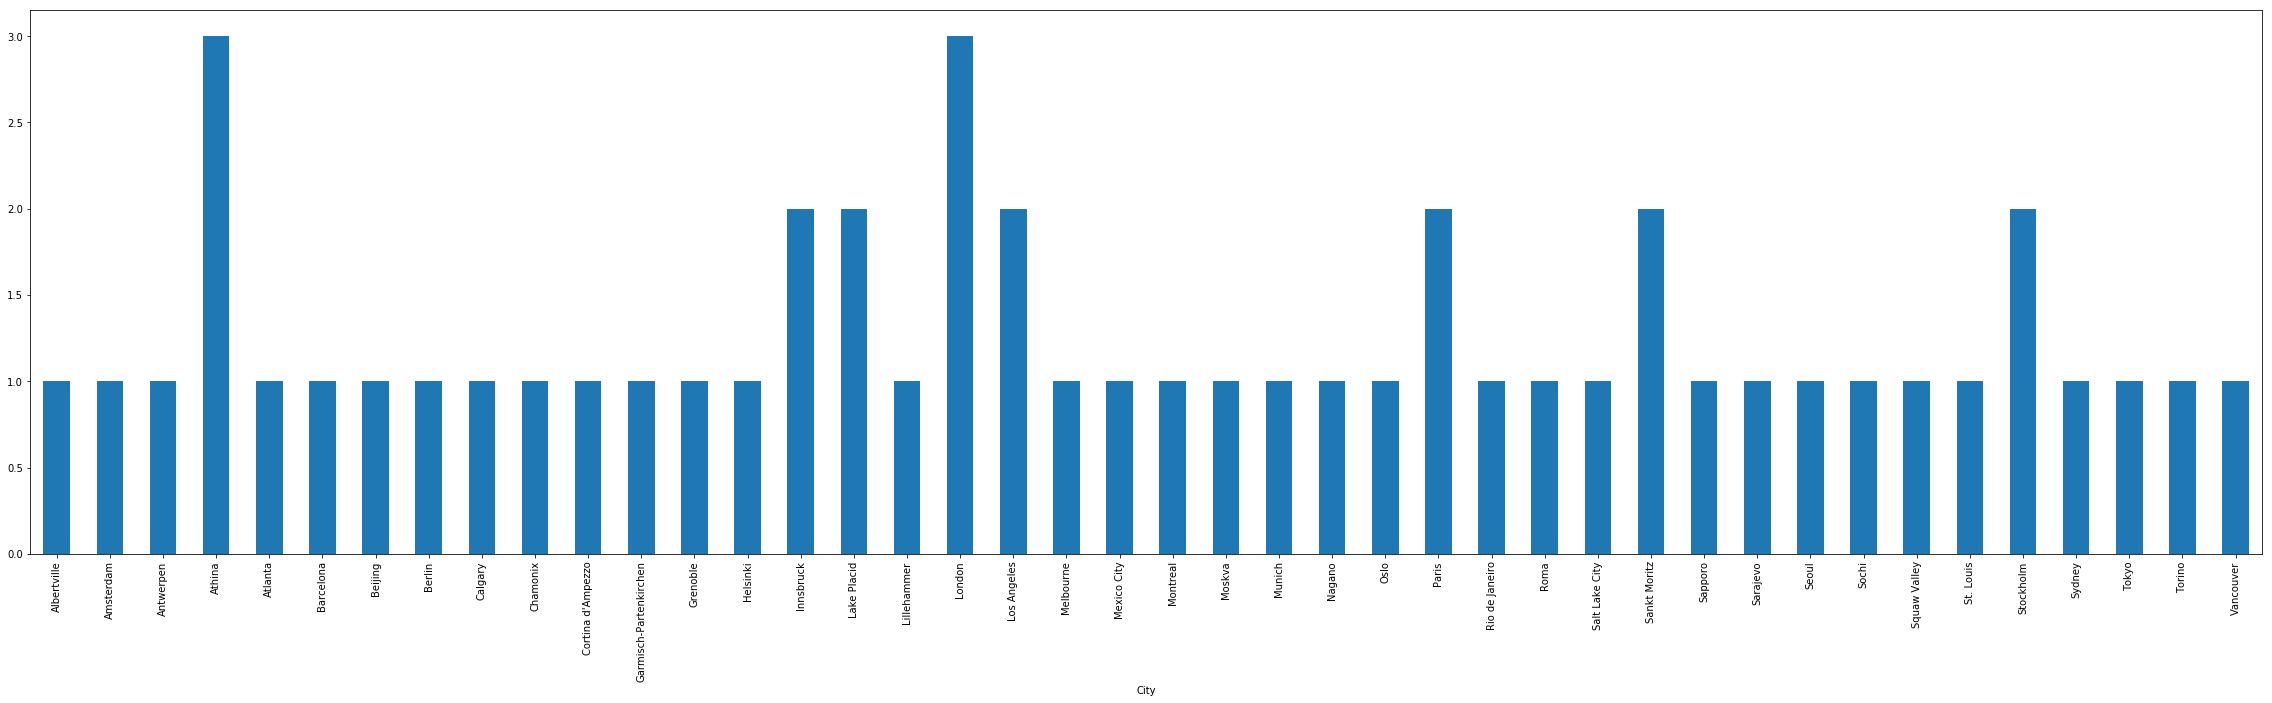

In [0]:
new_df = main.groupby(['City'])['Year'].nunique()
new_df.plot(kind='bar',figsize=(40,10))

Let's check the number of years a Sport has been selected as part of the olympics. The resulting plot shows that some Sports such as Athletics, Fencing, Cycling etc have been around for a long time while some sports such as Roque only appeared once in olympic history.

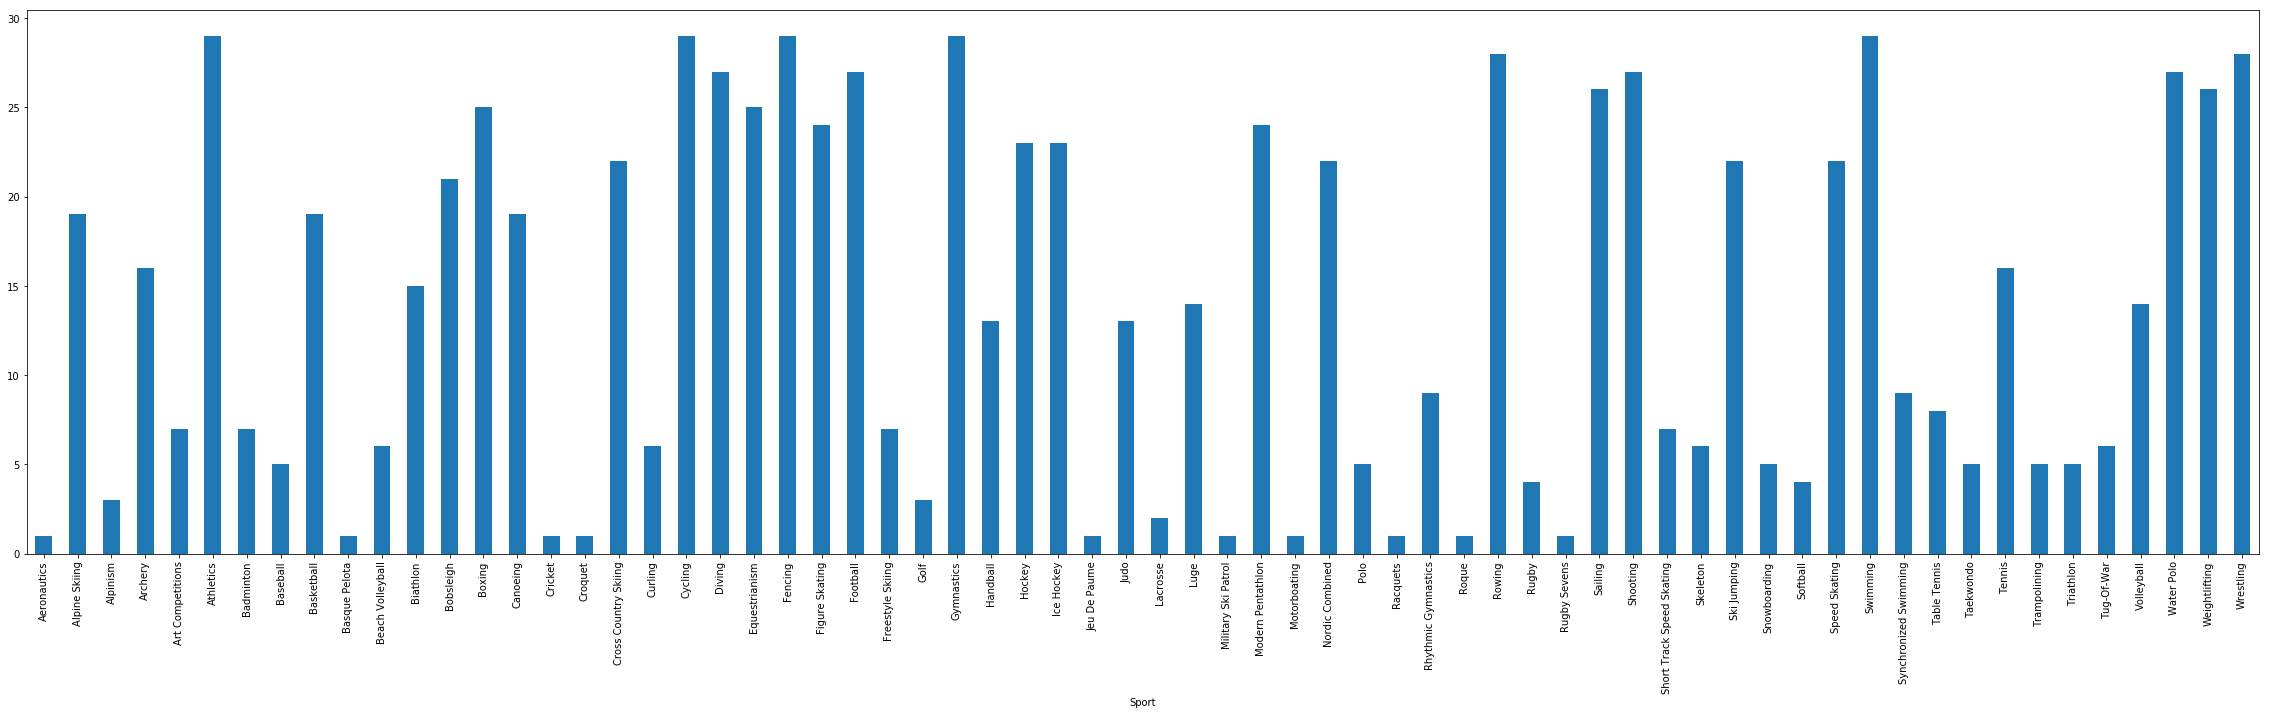

In [0]:
new_df = main.groupby(['Sport'])['Year'].nunique()
new_df.plot(kind='bar',figsize=(40,10))

Let's check the number of times an Event has been selected as part of the olympics. Interestingly, most of the highest-occuring events belong to athletics men events while most of the least-occuring events belong to archery men, art competitions mixed, swimming men & wrestling men categories.

In [0]:
new_df = main.groupby(['Event'])['Year'].nunique()
new_df[new_df==new_df.max()],new_df[new_df==new_df.min()] 

(Event
 Athletics Men's 1,500 metres          29
 Athletics Men's 100 metres            29
 Athletics Men's 110 metres Hurdles    29
 Athletics Men's 400 metres            29
 Athletics Men's 800 metres            29
 Athletics Men's Discus Throw          29
 Athletics Men's High Jump             29
 Athletics Men's Long Jump             29
 Athletics Men's Marathon              29
 Athletics Men's Pole Vault            29
 Athletics Men's Shot Put              29
 Athletics Men's Triple Jump           29
 Fencing Men's Sabre, Individual       29
 Name: Year, dtype: int64, Event
 Aeronautics Mixed Aeronautics                             1
 Archery Men's Au Chapelet, 33 metres                      1
 Archery Men's Au Chapelet, 50 metres                      1
 Archery Men's Au Cordon Dore, 33 metres                   1
 Archery Men's Au Cordon Dore, 50 metres                   1
 Archery Men's Championnat Du Monde                        1
 Archery Men's Continental Style                

Just for fun, we are going to examine if all 3 Medal types have been won in all years. This can be done by first filtering rows with medals, grouping by Medal & counting unique Year for each group. Of course, resulting count shows all 3 Medal types have been existence for all 35 olympic years.

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['Year'].nunique()

Medal
Bronze    35
Gold      35
Silver    35
Name: Year, dtype: int64

Let's check if it's possible for a City to be selected for both summer & winter Games. We can do this by grouping the data by City & doing a unique count of Season for each group. The result shows that each City can only hold either a summer or winter game, which is again not a surprise.

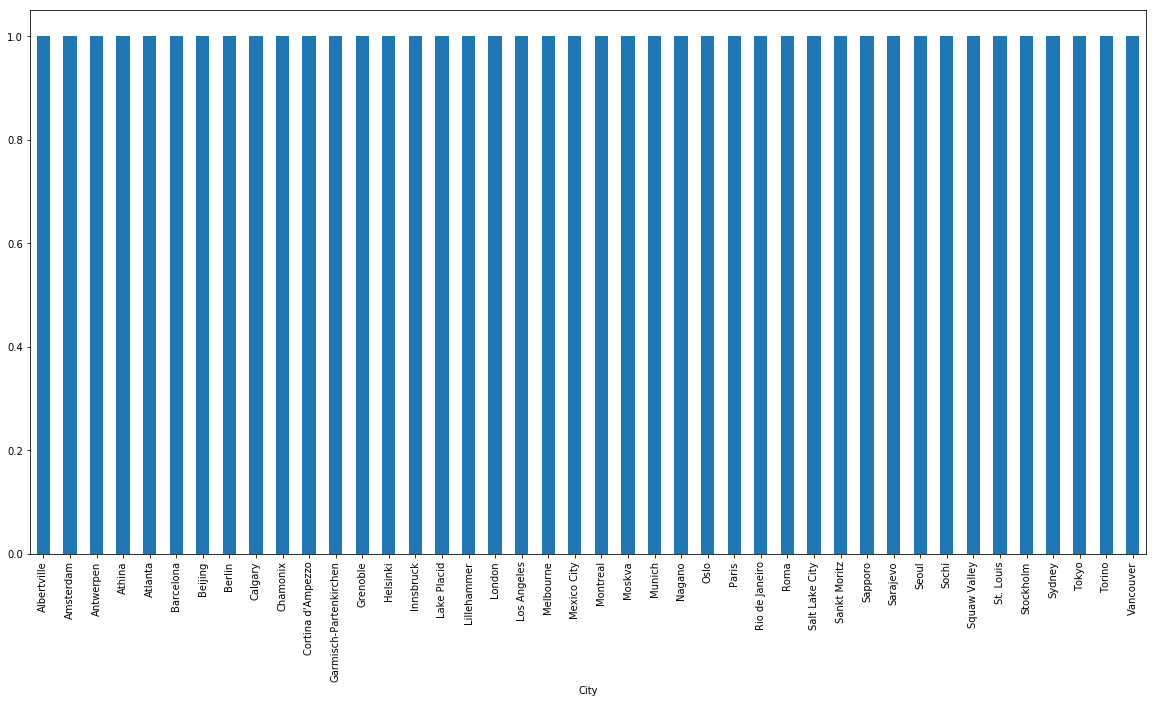

In [0]:
new_df = main.groupby(['City'])['Season'].nunique()
new_df.plot(kind='bar',figsize=(20,10))

Can a Sport be held in both seasons? Let's examine this by grouping the data by Sport & doing a unique Season count for each group. Don't be surprised by the findings! In fact, Figure Skating & Ice Hockey were both introduced as a Sport during a summer game before being transferred permanently to winter Games. Alpinism should be not considered as an olympic Sport since medals were awarded to individuals or groups that had achieved the most notable feat in mountaineering since previous Games. 

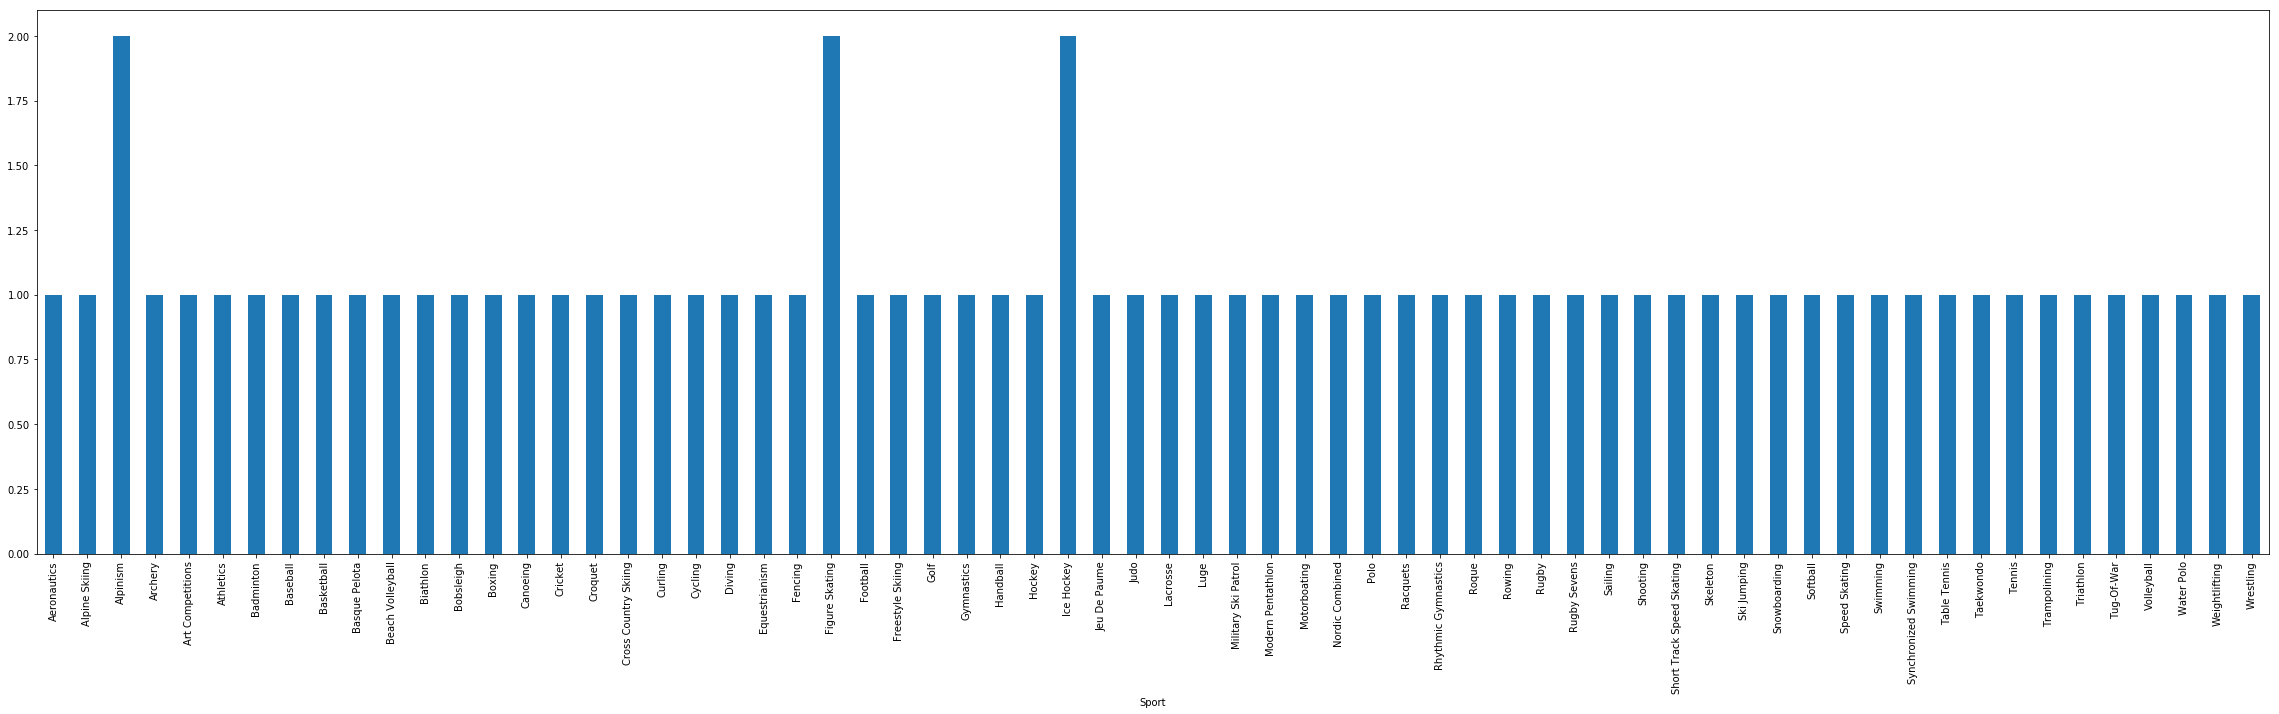

In [0]:
new_df = main.groupby(['Sport'])['Season'].nunique()
new_df.plot(kind='bar',figsize=(40,10))

Is it possible for an Event to be held in both seasons? We can check this by grouping the data by Event before giving a unique count of Season for each group. The results are not suprising as it closely-matches that of the above. 

In [0]:
new_df = main.groupby(['Event'])['Season'].nunique()
new_df[new_df==new_df.max()],new_df[new_df==new_df.min()] 

(Event
 Alpinism Mixed Alpinism           2
 Figure Skating Men's Singles      2
 Figure Skating Mixed Pairs        2
 Figure Skating Women's Singles    2
 Ice Hockey Men's Ice Hockey       2
 Name: Season, dtype: int64, Event
 Aeronautics Mixed Aeronautics                          1
 Alpine Skiing Men's Combined                           1
 Alpine Skiing Men's Downhill                           1
 Alpine Skiing Men's Giant Slalom                       1
 Alpine Skiing Men's Slalom                             1
 Alpine Skiing Men's Super G                            1
 Alpine Skiing Women's Combined                         1
 Alpine Skiing Women's Downhill                         1
 Alpine Skiing Women's Giant Slalom                     1
 Alpine Skiing Women's Slalom                           1
 Alpine Skiing Women's Super G                          1
 Archery Men's Au Chapelet, 33 metres                   1
 Archery Men's Au Chapelet, 50 metres                   1
 Archery Men's Au C

Just for fun, let's check if all 3 Medal types exist for both summer & winter Games. Of course, the results don't come as a surprise as all 3 Medal types exist for both summer & winter Games.

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['Season'].nunique()

Medal
Bronze    2
Gold      2
Silver    2
Name: Season, dtype: int64

Let's check how many distinct cities were each Sport held in. In fact, there's no surprises here as the result closely-matches that of the number of years a Sport has been selected as part of the olympics.

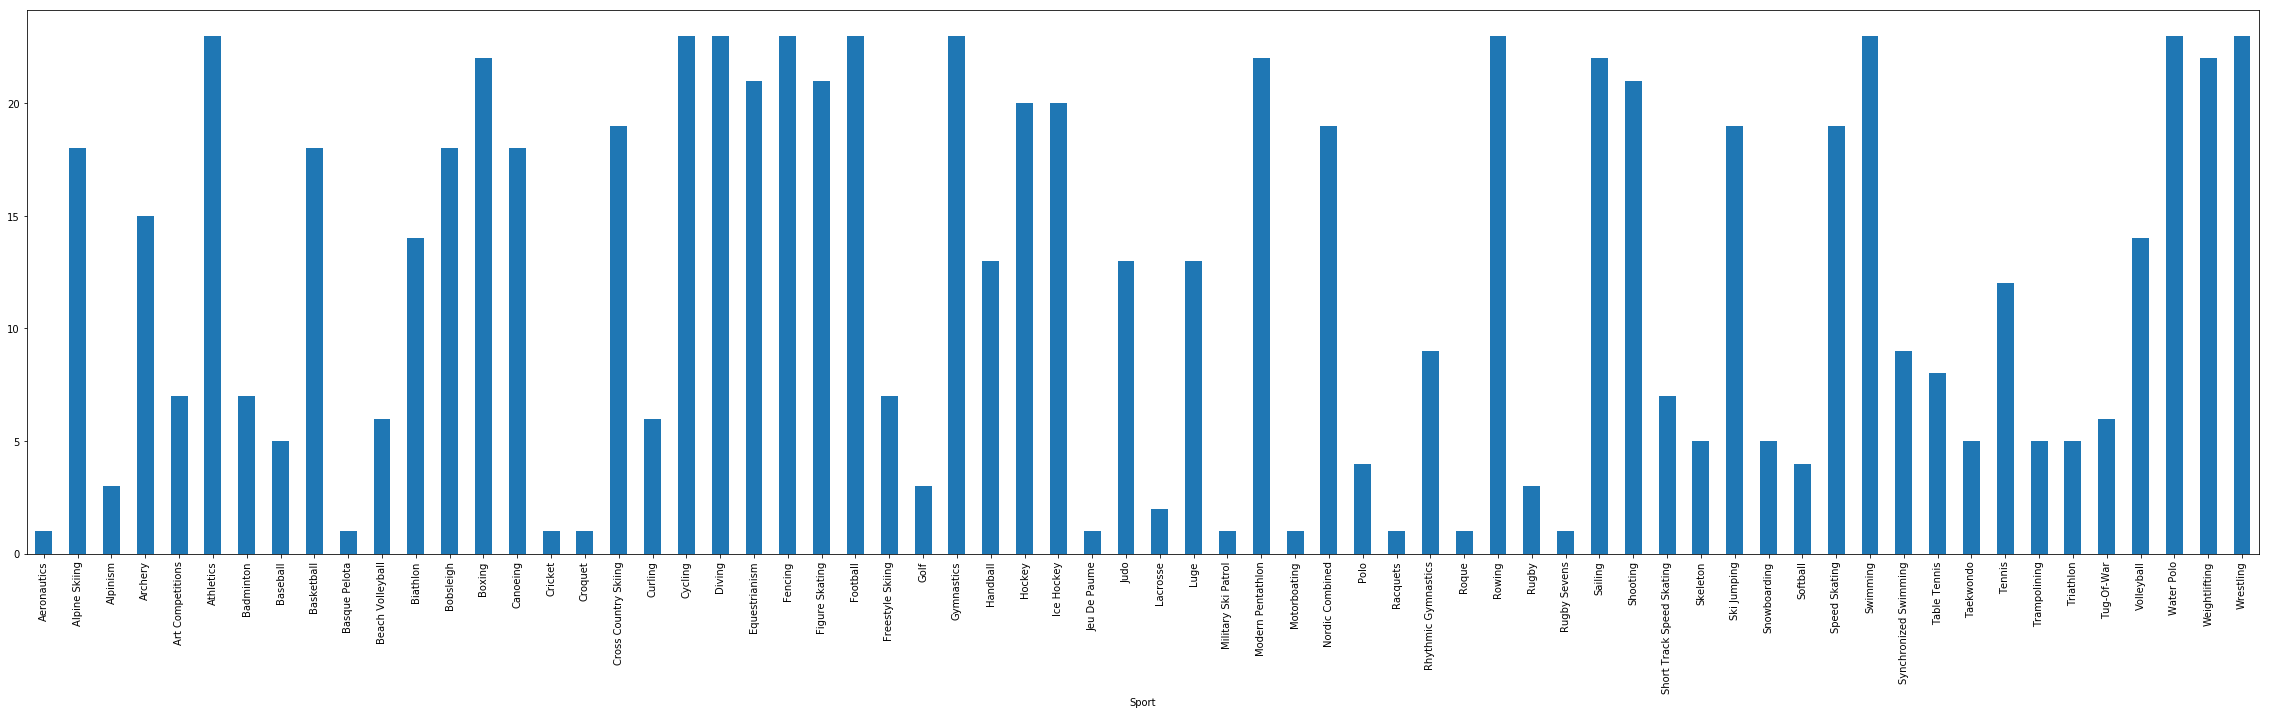

In [0]:
new_df = main.groupby(['Sport'])['City'].nunique()
new_df.plot(kind='bar',figsize=(40,10))

Let's check the number of distinct cities that each Event was held in. Again. no surprises here as it closely-resembles the number of times an Event was selected as part of the olympics.

In [0]:
new_df = main.groupby(['Event'])['City'].nunique()
new_df[new_df==new_df.max()],new_df[new_df==new_df.min()] 

(Event
 Athletics Men's 1,500 metres              23
 Athletics Men's 100 metres                23
 Athletics Men's 110 metres Hurdles        23
 Athletics Men's 200 metres                23
 Athletics Men's 400 metres                23
 Athletics Men's 800 metres                23
 Athletics Men's Discus Throw              23
 Athletics Men's Hammer Throw              23
 Athletics Men's High Jump                 23
 Athletics Men's Long Jump                 23
 Athletics Men's Marathon                  23
 Athletics Men's Pole Vault                23
 Athletics Men's Shot Put                  23
 Athletics Men's Triple Jump               23
 Diving Men's Springboard                  23
 Fencing Men's Foil, Individual            23
 Fencing Men's Sabre, Individual           23
 Fencing Men's epee, Individual            23
 Football Men's Football                   23
 Gymnastics Men's Individual All-Around    23
 Gymnastics Men's Team All-Around          23
 Rowing Men's Coxed Eights 

Just for fun, we can check if all 3 Medal types exist for all cities. And yes, results show that all 3 Medal types do exist for all 42 cities.

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['City'].nunique()

Medal
Bronze    42
Gold      42
Silver    42
Name: City, dtype: int64

Can an Event exist for multiple sports? We can check this by grouping data by Event before doing a unique Sport count for each group. As expected, all events can only belong to 1 Sport.

In [0]:
new_df = main.groupby(['Event'])['Sport'].nunique()
new_df[new_df==new_df.max()],new_df[new_df==new_df.min()] 

(Event
 Aeronautics Mixed Aeronautics                          1
 Alpine Skiing Men's Combined                           1
 Alpine Skiing Men's Downhill                           1
 Alpine Skiing Men's Giant Slalom                       1
 Alpine Skiing Men's Slalom                             1
 Alpine Skiing Men's Super G                            1
 Alpine Skiing Women's Combined                         1
 Alpine Skiing Women's Downhill                         1
 Alpine Skiing Women's Giant Slalom                     1
 Alpine Skiing Women's Slalom                           1
 Alpine Skiing Women's Super G                          1
 Alpinism Mixed Alpinism                                1
 Archery Men's Au Chapelet, 33 metres                   1
 Archery Men's Au Chapelet, 50 metres                   1
 Archery Men's Au Cordon Dore, 33 metres                1
 Archery Men's Au Cordon Dore, 50 metres                1
 Archery Men's Championnat Du Monde                     1
 Archer

We can check if all 3 Medal types exist for all sports. Interestingly, the numbers are all different. I highly-suspect this is due to addition & removal of sports as well as awarding only 1 Medal type for a certain Sport(such as Alpining).

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['Sport'].nunique()

Medal
Bronze    61
Gold      66
Silver    62
Name: Sport, dtype: int64

We can check if all 3 Medal types exist for all events. Interestingly, the numbers are all different. I highly-suspect this is due to addition & removal of events as well as awarding only 1 Medal type for a certain Event(such as those belonging to the Alpining category).

In [0]:
main[main['Medal'].notnull()].groupby(['Medal'])['Event'].nunique()

Medal
Bronze    725
Gold      750
Silver    740
Name: Event, dtype: int64

Plotting a correlation matrix for continuous variables, one can observe a strong correlation between Height & Weight. 

In [0]:
corr = main.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Age,Height,Weight,Year
ID,1,-0.00363121,-0.0111406,-0.00917644,0.0118849
Age,-0.00363121,1,0.138246,0.212069,-0.115137
Height,-0.0111406,0.138246,1,0.796213,0.0475779
Weight,-0.00917644,0.212069,0.796213,1,0.0190946
Year,0.0118849,-0.115137,0.0475779,0.0190946,1


Summary stats for continuous variables. Note that there are definitely errors in the data. For instance, the max Age is incorrect. Doing a simple online search for that person shows that he only lived for 80 years.

In [0]:
main.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In all, the olympics dataset provided an interesting analysis. However results may differ from their true values due to missing values for Age,Height & Weight columns. Feel free to add more visualizations as you please:)